### DSCI 510 Fall 2020 Final Project Submission

1.	**The name of student**:
    
    Jinwang Cui


2.	**Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.)**

   It's a pity that the manga_sales dataset is much smaller than I thought(because the manga's name not always the same as the anime's name), and I can not find a more abundant dataset in a short time, which leads to the result of the analysis is not as good as I expected.
   
   In addition,the catboost may take some time to run, please be patient.
   
   Finally, because the time is limited, I can't make more exploration to these dataset, what a pity!
   
   (more things about scraper.)
   
   Firstly,it will take a very long time to scrape data from the internet, and since I used "try ... except" to make the scraper more robust, so if you get many "time out" errors you should stop the scraper and check the status of internet.
   
   Secondly, in order to access Myanimelist_manga API, the access token is necessary and the token will be expired in a month. So if the token is invalid, please contact me.
   
   Thirdly, if you want to run the scraper, you should install Chromedriver first.

3. **Any libraries that need to be installed to run your code (see above)**

  - pyecharts,numpy,pandas,matplotlib,seaborn,sklearn,math,requests,time,BeautifulSoup,PIL,io is necessary
  
    Please make sure that you install these libraries successfully, especially pyecharts(https://pyecharts.org/#/)

4.	**Anything else you feel is relevant to the grading of your project your project.**
    
   - Please make sure you have installed all of the libraries above successfully to run the notebook, please contact me if you have trouble.
   
   - In order to run the notebook properly, please make sure you put the codes in the src in the proper location( you should make the two codes in the src and the final_project.ipynb in the same folder.)
   
   - You can interact with some of the graph I generated to get more information.
    
   - If you can not see anything in the Bar chart, please use the DataZoom on the right and under the chart to get the whole view of the chart.

5.	**What did you set out to study?  (i.e. what was the point of your project?  This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)**
   
   - Factors affecting the rating of animation
   
   - What kinds of anime&&manga is the most popular
   
   - The relationship between anime score and manga score
   
   - The relationship between manga sales and manga ratings
   
   - The relationship between anime Studios and anime rating

6.	**What did you Discover/what were your conclusions (i.e. what were your findings?  Were your original assumptions confirmed, etc.?)**

    What I have discovered is shown below.
    
    And most of my original assumptions are confirmed.

In [1]:
from data_analysis import anime_process
import data_preprocessor as dp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ap=anime_process()

# Myanimelist_anime_data analysis

## Get the top anime data

In [3]:
ap.myanimelist_anime.head()

,rank,name,link,img_link,Studios,Source,Genres,Popularity,Favorites,type,...,Martial Arts,Demons,Shoujo,Dementia,Harem,Ecchi,Shounen Ai,Cars,Kids,Shoujo Ai
0,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,https://cdn.myanimelist.net/r/100x140/images/a...,Bones,Manga,"['Action', 'Military', 'Adventure', 'Comedy', ...",4,168851,TV,...,0,0,0,0,0,0,0,0,0,0
1,2,Steins;Gate,https://myanimelist.net/anime/9253/Steins_Gate,https://cdn.myanimelist.net/r/100x140/images/a...,White Fox,Visual novel,"['Thriller', 'Sci-Fi']",9,140744,TV,...,0,0,0,0,0,0,0,0,0,0
2,3,Gintama°,https://myanimelist.net/anime/28977/Gintama°,https://cdn.myanimelist.net/r/100x140/images/a...,Bandai Namco Pictures,Manga,"['Action', 'Comedy', 'Historical', 'Parody', '...",333,10460,TV,...,0,0,0,0,0,0,0,0,0,0
3,4,Hunter x Hunter (2011),https://myanimelist.net/anime/11061/Hunter_x_H...,https://cdn.myanimelist.net/r/100x140/images/a...,Madhouse,Manga,"['Action', 'Adventure', 'Fantasy', 'Shounen', ...",14,131914,TV,...,0,0,0,0,0,0,0,0,0,0
4,5,Ginga Eiyuu Densetsu,https://myanimelist.net/anime/820/Ginga_Eiyuu_...,https://cdn.myanimelist.net/r/100x140/images/a...,Artland,Novel,"['Military', 'Sci-Fi', 'Space', 'Drama']",633,13168,OVA,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# you can get the maximum of 10 numbers of data at once and  you can set 'offset' to get other animes
anime_dic=ap.get_myani_ani_top(5,5)
anime_dic

[{'rank': 6,
  'name': "Gintama'",
  'link': 'https://myanimelist.net/anime/9969/Gintama',
  'img_link': 'https://cdn.myanimelist.net/r/100x140/images/anime/4/50361.jpg?s=0fde0801daa3b436029146f401e5e77f',
  'Studios': 'Sunrise',
  'Source': 'Manga',
  'Genres': "['Action', 'Sci-Fi', 'Comedy', 'Historical', 'Parody', 'Samurai', 'Shounen']",
  'Popularity': 360},
 {'rank': 7,
  'name': 'Shingeki no Kyojin Season 3 Part 2',
  'link': 'https://myanimelist.net/anime/38524/Shingeki_no_Kyojin_Season_3_Part_2',
  'img_link': 'https://cdn.myanimelist.net/r/100x140/images/anime/1517/100633.jpg?s=63aa0647fb4eba3fd80288489f0a64a4',
  'Studios': 'Wit Studio',
  'Source': 'Manga',
  'Genres': "['Action', 'Military', 'Mystery', 'Super Power', 'Drama', 'Fantasy', 'Shounen']",
  'Popularity': 81},
 {'rank': 8,
  'name': "Gintama': Enchousen",
  'link': 'https://myanimelist.net/anime/15417/Gintama__Enchousen',
  'img_link': 'https://cdn.myanimelist.net/r/100x140/images/anime/6/75172.jpg?s=9c0b62c54b4ee

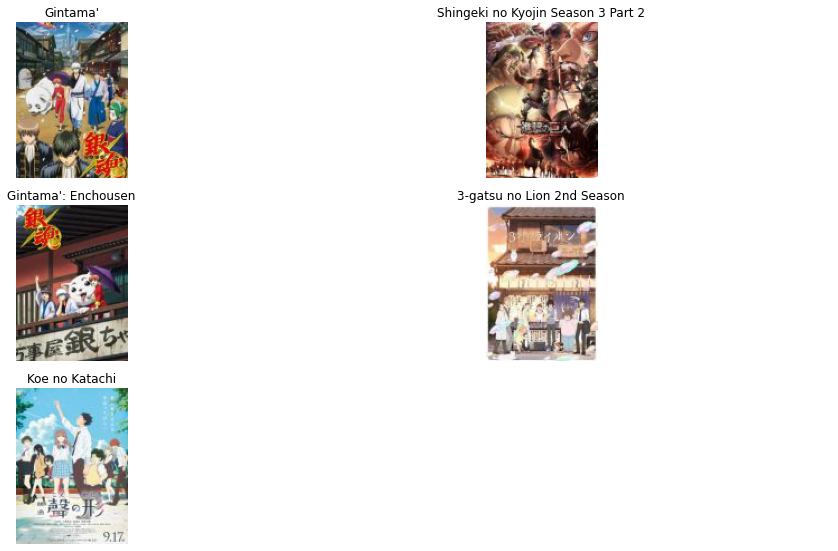

In [6]:
# you can see the imgs of the animes above
ap.show(anime_dic,'name','img_link')

## Myanimelist_anime_pie

In [7]:
num,t=dp.genres_process(ap.myanimelist_anime.Genres)

In [8]:
ap.plot_pie(num,'Myanimelist_anime')

As you can see, the top three kinds of anime is **Comedy**,**Action**,**Drama**

## Myanimelist_words_Cloud

In [9]:
ap.word_cloud(num,'Myanimelist_anime')

## Myanimelist_anime&&Studios

In [10]:
df=ap.myanimelist_anime
ap.plot_pie(df.Studios.value_counts(),'Studios_1000')

In [11]:
ap.plot_pie(df[:100].Studios.value_counts(),'Studios_top100')

In [12]:
ap.plot_pie(df[:10].Studios.value_counts(),'Studios_top10')

As you can see above,**Madhouse**,**Sunrise** produced a lot of top animes,and the top 10 animation producsors are very evenly distributed

## Myanimelist_anime_Heapmap

In [13]:
df=ap.myanimelist_anime
df1=df[['rank','score','Popularity','Favorites','members','Watching','Completed','On-Hold','Dropped','Plan_to_Watch','Total']]
df2=df1.apply(lambda x:x.astype(float))

In [14]:
values = [[i, j, round(df2.corr(method='spearman').values.tolist()[i][j], 2)] for i in range(11) for j in range(11)]
columns = list(df2.columns)
ap.heat_map_echart(values,columns,'Myanimelist_anime')

There are several factors that have some relationship with anime score, which are **Favorites**,**Plan_to_Watch**,**members** and **Popularity**. However, the relations between them are not as big as I have thought

## Randomforest regression of Myanimelist_anime

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
class_le = LabelEncoder()
df=ap.myanimelist_anime
df['type'] = class_le.fit_transform(df['type'].values)
x = df.iloc[:, 7:].drop(['score', 'date'], axis=1).values
y = df.loc[:, ['score']].values.ravel()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)        
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('mean_absolute_error:',mae)
# y_pred

mean_absolute_error: 0.16832533333333355


The Randomforest regression can predict the anime score with a MAE of around 0.17

## Feature_Importance

In [17]:
rf_fea = [i*100 for i in rf.feature_importances_]
rf_fea_name = df.iloc[:,7:].drop(['score','date'],axis=1).columns.tolist()
ap.plot_bar('My_anime_rf',rf_fea_name,rf_fea)

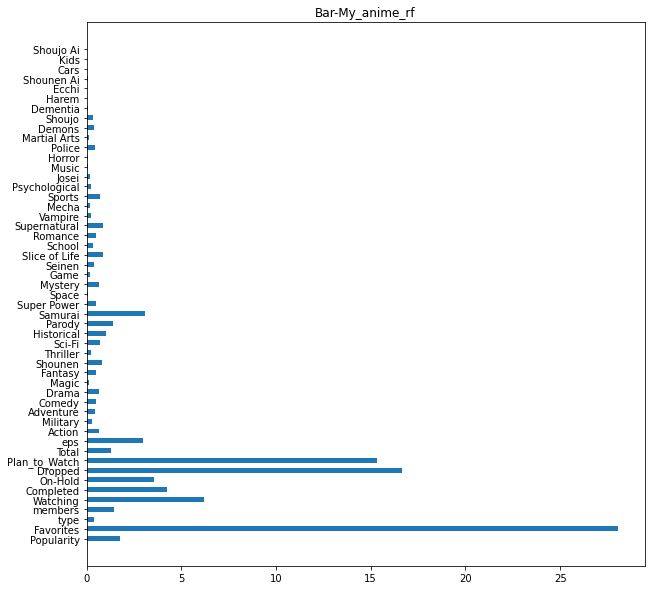

In [18]:
ap.plot_bar('My_anime_rf',rf_fea_name,rf_fea,echarts=False)

According to two graphs shown above,there are three key factors that affect the anime score, which are **Favorites**,**Dropped** and **Plan_to_Watch**. These three factors is almost the same as the heatmap shows.

## Catboost

In [19]:
df=ap.myanimelist_anime
x2=df.iloc[:,4:].drop(['score','Genres','date'],axis=1)
y2=df.loc[:,['score']]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x2,y2,test_size=0.3)
int_cols=['Popularity','Favorites','members','Watching','Completed','On-Hold','Dropped','Plan_to_Watch','Total']
for col in int_cols:
    x2[col]=x2[col].astype(float)
#coding=utf8
from catboost import CatBoostRegressor
categorical_features_indices = np.where(pd.DataFrame(x2).dtypes != np.float)[0]#类别型特征
#model = CatBoostClassifier(iterations=100, depth=5,cat_features=categorical_features_indices,
#                           learning_rate=0.5, loss_function='Logloss',logging_level='Verbose')
model = CatBoostRegressor(iterations=1000, depth=5,cat_features=categorical_features_indices,
                           learning_rate=0.1, loss_function='MAE',logging_level='Verbose')
model.fit(X_train,Y_train,eval_set=(X_test, Y_test),plot=True)
# import matplotlib.pyplot as plt 
fea_ = model.feature_importances_
fea_name = model.feature_names_


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2235418	test: 0.2407890	best: 0.2407890 (0)	total: 85ms	remaining: 1m 24s
1:	learn: 0.2168581	test: 0.2358550	best: 0.2358550 (1)	total: 126ms	remaining: 1m 3s
2:	learn: 0.2125426	test: 0.2331235	best: 0.2331235 (2)	total: 174ms	remaining: 57.9s
3:	learn: 0.2091833	test: 0.2317915	best: 0.2317915 (3)	total: 219ms	remaining: 54.6s
4:	learn: 0.2055151	test: 0.2290430	best: 0.2290430 (4)	total: 262ms	remaining: 52.2s
5:	learn: 0.2008935	test: 0.2243108	best: 0.2243108 (5)	total: 305ms	remaining: 50.6s
6:	learn: 0.1983923	test: 0.2218283	best: 0.2218283 (6)	total: 348ms	remaining: 49.4s
7:	learn: 0.1966178	test: 0.2205144	best: 0.2205144 (7)	total: 392ms	remaining: 48.6s
8:	learn: 0.1944550	test: 0.2190218	best: 0.2190218 (8)	total: 438ms	remaining: 48.2s
9:	learn: 0.1923127	test: 0.2176515	best: 0.2176515 (9)	total: 478ms	remaining: 47.4s
10:	learn: 0.1910289	test: 0.2171186	best: 0.2171186 (10)	total: 522ms	remaining: 46.9s
11:	learn: 0.1873348	test: 0.2149754	best: 0.2149754

95:	learn: 0.1193781	test: 0.1755162	best: 0.1755162 (95)	total: 4.53s	remaining: 42.7s
96:	learn: 0.1191162	test: 0.1754914	best: 0.1754914 (96)	total: 4.57s	remaining: 42.6s
97:	learn: 0.1184595	test: 0.1752272	best: 0.1752272 (97)	total: 4.62s	remaining: 42.6s
98:	learn: 0.1177686	test: 0.1749683	best: 0.1749683 (98)	total: 4.67s	remaining: 42.5s
99:	learn: 0.1170244	test: 0.1744436	best: 0.1744436 (99)	total: 4.73s	remaining: 42.6s
100:	learn: 0.1162850	test: 0.1743640	best: 0.1743640 (100)	total: 4.79s	remaining: 42.6s
101:	learn: 0.1158848	test: 0.1741135	best: 0.1741135 (101)	total: 4.85s	remaining: 42.7s
102:	learn: 0.1154533	test: 0.1737775	best: 0.1737775 (102)	total: 4.9s	remaining: 42.7s
103:	learn: 0.1149356	test: 0.1734092	best: 0.1734092 (103)	total: 4.95s	remaining: 42.7s
104:	learn: 0.1144159	test: 0.1735427	best: 0.1734092 (103)	total: 5.01s	remaining: 42.7s
105:	learn: 0.1137329	test: 0.1731835	best: 0.1731835 (105)	total: 5.05s	remaining: 42.6s
106:	learn: 0.1132081

190:	learn: 0.0893486	test: 0.1648255	best: 0.1648255 (190)	total: 8.79s	remaining: 37.2s
191:	learn: 0.0891124	test: 0.1648017	best: 0.1648017 (191)	total: 8.83s	remaining: 37.2s
192:	learn: 0.0888411	test: 0.1647868	best: 0.1647868 (192)	total: 8.88s	remaining: 37.1s
193:	learn: 0.0887377	test: 0.1647644	best: 0.1647644 (193)	total: 8.92s	remaining: 37.1s
194:	learn: 0.0886550	test: 0.1647308	best: 0.1647308 (194)	total: 8.96s	remaining: 37s
195:	learn: 0.0880929	test: 0.1649542	best: 0.1647308 (194)	total: 9.01s	remaining: 37s
196:	learn: 0.0878583	test: 0.1647050	best: 0.1647050 (196)	total: 9.06s	remaining: 36.9s
197:	learn: 0.0876102	test: 0.1646179	best: 0.1646179 (197)	total: 9.1s	remaining: 36.9s
198:	learn: 0.0874616	test: 0.1646587	best: 0.1646179 (197)	total: 9.15s	remaining: 36.8s
199:	learn: 0.0873608	test: 0.1645825	best: 0.1645825 (199)	total: 9.19s	remaining: 36.8s
200:	learn: 0.0873067	test: 0.1645667	best: 0.1645667 (200)	total: 9.24s	remaining: 36.7s
201:	learn: 0.0

282:	learn: 0.0740594	test: 0.1611991	best: 0.1611991 (282)	total: 13s	remaining: 33s
283:	learn: 0.0740305	test: 0.1612060	best: 0.1611991 (282)	total: 13.1s	remaining: 33s
284:	learn: 0.0738841	test: 0.1610920	best: 0.1610920 (284)	total: 13.1s	remaining: 32.9s
285:	learn: 0.0738091	test: 0.1612608	best: 0.1610920 (284)	total: 13.2s	remaining: 32.9s
286:	learn: 0.0736505	test: 0.1612224	best: 0.1610920 (284)	total: 13.2s	remaining: 32.8s
287:	learn: 0.0734057	test: 0.1611498	best: 0.1610920 (284)	total: 13.3s	remaining: 32.8s
288:	learn: 0.0733804	test: 0.1611290	best: 0.1610920 (284)	total: 13.3s	remaining: 32.8s
289:	learn: 0.0733745	test: 0.1611166	best: 0.1610920 (284)	total: 13.4s	remaining: 32.7s
290:	learn: 0.0733192	test: 0.1610426	best: 0.1610426 (290)	total: 13.4s	remaining: 32.7s
291:	learn: 0.0732753	test: 0.1610725	best: 0.1610426 (290)	total: 13.5s	remaining: 32.6s
292:	learn: 0.0731163	test: 0.1611325	best: 0.1610426 (290)	total: 13.5s	remaining: 32.6s
293:	learn: 0.07

376:	learn: 0.0657663	test: 0.1598519	best: 0.1598519 (376)	total: 17.7s	remaining: 29.3s
377:	learn: 0.0656370	test: 0.1598084	best: 0.1598084 (377)	total: 17.8s	remaining: 29.3s
378:	learn: 0.0655162	test: 0.1598170	best: 0.1598084 (377)	total: 17.8s	remaining: 29.2s
379:	learn: 0.0654020	test: 0.1597603	best: 0.1597603 (379)	total: 17.9s	remaining: 29.2s
380:	learn: 0.0652336	test: 0.1598361	best: 0.1597603 (379)	total: 17.9s	remaining: 29.1s
381:	learn: 0.0651765	test: 0.1598475	best: 0.1597603 (379)	total: 18s	remaining: 29.1s
382:	learn: 0.0651544	test: 0.1598636	best: 0.1597603 (379)	total: 18s	remaining: 29s
383:	learn: 0.0650954	test: 0.1596914	best: 0.1596914 (383)	total: 18.1s	remaining: 29s
384:	learn: 0.0649590	test: 0.1597158	best: 0.1596914 (383)	total: 18.1s	remaining: 28.9s
385:	learn: 0.0647994	test: 0.1596067	best: 0.1596067 (385)	total: 18.1s	remaining: 28.9s
386:	learn: 0.0647508	test: 0.1596138	best: 0.1596067 (385)	total: 18.2s	remaining: 28.8s
387:	learn: 0.0647

468:	learn: 0.0585344	test: 0.1590658	best: 0.1590658 (468)	total: 22.1s	remaining: 25s
469:	learn: 0.0584190	test: 0.1590475	best: 0.1590475 (469)	total: 22.1s	remaining: 25s
470:	learn: 0.0583690	test: 0.1589684	best: 0.1589684 (470)	total: 22.2s	remaining: 24.9s
471:	learn: 0.0582925	test: 0.1590740	best: 0.1589684 (470)	total: 22.2s	remaining: 24.9s
472:	learn: 0.0582583	test: 0.1591001	best: 0.1589684 (470)	total: 22.3s	remaining: 24.8s
473:	learn: 0.0582363	test: 0.1590654	best: 0.1589684 (470)	total: 22.3s	remaining: 24.8s
474:	learn: 0.0582046	test: 0.1590309	best: 0.1589684 (470)	total: 22.4s	remaining: 24.7s
475:	learn: 0.0581333	test: 0.1589646	best: 0.1589646 (475)	total: 22.4s	remaining: 24.7s
476:	learn: 0.0579912	test: 0.1587837	best: 0.1587837 (476)	total: 22.5s	remaining: 24.6s
477:	learn: 0.0579244	test: 0.1587921	best: 0.1587837 (476)	total: 22.5s	remaining: 24.6s
478:	learn: 0.0579087	test: 0.1587865	best: 0.1587837 (476)	total: 22.6s	remaining: 24.5s
479:	learn: 0.

562:	learn: 0.0533682	test: 0.1588316	best: 0.1584865 (521)	total: 26.3s	remaining: 20.4s
563:	learn: 0.0533223	test: 0.1587818	best: 0.1584865 (521)	total: 26.3s	remaining: 20.4s
564:	learn: 0.0532262	test: 0.1587453	best: 0.1584865 (521)	total: 26.4s	remaining: 20.3s
565:	learn: 0.0531818	test: 0.1587428	best: 0.1584865 (521)	total: 26.4s	remaining: 20.3s
566:	learn: 0.0531654	test: 0.1587468	best: 0.1584865 (521)	total: 26.5s	remaining: 20.2s
567:	learn: 0.0531261	test: 0.1587019	best: 0.1584865 (521)	total: 26.5s	remaining: 20.2s
568:	learn: 0.0529627	test: 0.1586990	best: 0.1584865 (521)	total: 26.6s	remaining: 20.1s
569:	learn: 0.0529472	test: 0.1587053	best: 0.1584865 (521)	total: 26.6s	remaining: 20.1s
570:	learn: 0.0528806	test: 0.1587017	best: 0.1584865 (521)	total: 26.6s	remaining: 20s
571:	learn: 0.0527741	test: 0.1585746	best: 0.1584865 (521)	total: 26.7s	remaining: 20s
572:	learn: 0.0527506	test: 0.1585851	best: 0.1584865 (521)	total: 26.7s	remaining: 19.9s
573:	learn: 0.

655:	learn: 0.0492845	test: 0.1583398	best: 0.1581173 (644)	total: 30.3s	remaining: 15.9s
656:	learn: 0.0492590	test: 0.1583375	best: 0.1581173 (644)	total: 30.4s	remaining: 15.9s
657:	learn: 0.0492517	test: 0.1583293	best: 0.1581173 (644)	total: 30.4s	remaining: 15.8s
658:	learn: 0.0492115	test: 0.1583070	best: 0.1581173 (644)	total: 30.5s	remaining: 15.8s
659:	learn: 0.0492051	test: 0.1583132	best: 0.1581173 (644)	total: 30.5s	remaining: 15.7s
660:	learn: 0.0491164	test: 0.1583477	best: 0.1581173 (644)	total: 30.5s	remaining: 15.7s
661:	learn: 0.0490031	test: 0.1581718	best: 0.1581173 (644)	total: 30.6s	remaining: 15.6s
662:	learn: 0.0488932	test: 0.1581257	best: 0.1581173 (644)	total: 30.6s	remaining: 15.6s
663:	learn: 0.0488856	test: 0.1581158	best: 0.1581158 (663)	total: 30.7s	remaining: 15.5s
664:	learn: 0.0487890	test: 0.1581252	best: 0.1581158 (663)	total: 30.7s	remaining: 15.5s
665:	learn: 0.0487734	test: 0.1581021	best: 0.1581021 (665)	total: 30.7s	remaining: 15.4s
666:	learn

750:	learn: 0.0457905	test: 0.1580928	best: 0.1580756 (693)	total: 34.4s	remaining: 11.4s
751:	learn: 0.0457253	test: 0.1580365	best: 0.1580365 (751)	total: 34.5s	remaining: 11.4s
752:	learn: 0.0457112	test: 0.1580160	best: 0.1580160 (752)	total: 34.5s	remaining: 11.3s
753:	learn: 0.0457018	test: 0.1580103	best: 0.1580103 (753)	total: 34.6s	remaining: 11.3s
754:	learn: 0.0456574	test: 0.1579502	best: 0.1579502 (754)	total: 34.6s	remaining: 11.2s
755:	learn: 0.0456410	test: 0.1579311	best: 0.1579311 (755)	total: 34.6s	remaining: 11.2s
756:	learn: 0.0456210	test: 0.1579156	best: 0.1579156 (756)	total: 34.7s	remaining: 11.1s
757:	learn: 0.0456012	test: 0.1578834	best: 0.1578834 (757)	total: 34.7s	remaining: 11.1s
758:	learn: 0.0455793	test: 0.1578753	best: 0.1578753 (758)	total: 34.8s	remaining: 11s
759:	learn: 0.0455454	test: 0.1578641	best: 0.1578641 (759)	total: 34.8s	remaining: 11s
760:	learn: 0.0455043	test: 0.1577801	best: 0.1577801 (760)	total: 34.8s	remaining: 10.9s
761:	learn: 0.

847:	learn: 0.0428671	test: 0.1569149	best: 0.1568705 (845)	total: 38.6s	remaining: 6.92s
848:	learn: 0.0428210	test: 0.1569174	best: 0.1568705 (845)	total: 38.7s	remaining: 6.88s
849:	learn: 0.0427976	test: 0.1569254	best: 0.1568705 (845)	total: 38.7s	remaining: 6.83s
850:	learn: 0.0427375	test: 0.1568921	best: 0.1568705 (845)	total: 38.7s	remaining: 6.78s
851:	learn: 0.0427050	test: 0.1568795	best: 0.1568705 (845)	total: 38.8s	remaining: 6.74s
852:	learn: 0.0426924	test: 0.1569105	best: 0.1568705 (845)	total: 38.8s	remaining: 6.69s
853:	learn: 0.0426522	test: 0.1568763	best: 0.1568705 (845)	total: 38.9s	remaining: 6.64s
854:	learn: 0.0425233	test: 0.1567009	best: 0.1567009 (854)	total: 38.9s	remaining: 6.6s
855:	learn: 0.0424924	test: 0.1567019	best: 0.1567009 (854)	total: 38.9s	remaining: 6.55s
856:	learn: 0.0424161	test: 0.1566686	best: 0.1566686 (856)	total: 39s	remaining: 6.5s
857:	learn: 0.0423939	test: 0.1566539	best: 0.1566539 (857)	total: 39s	remaining: 6.46s
858:	learn: 0.04

941:	learn: 0.0400234	test: 0.1564028	best: 0.1563957 (940)	total: 42.7s	remaining: 2.63s
942:	learn: 0.0399816	test: 0.1563964	best: 0.1563957 (940)	total: 42.7s	remaining: 2.58s
943:	learn: 0.0399773	test: 0.1563944	best: 0.1563944 (943)	total: 42.8s	remaining: 2.54s
944:	learn: 0.0399665	test: 0.1564041	best: 0.1563944 (943)	total: 42.8s	remaining: 2.49s
945:	learn: 0.0399586	test: 0.1564059	best: 0.1563944 (943)	total: 42.8s	remaining: 2.44s
946:	learn: 0.0399213	test: 0.1564138	best: 0.1563944 (943)	total: 42.9s	remaining: 2.4s
947:	learn: 0.0398853	test: 0.1564022	best: 0.1563944 (943)	total: 42.9s	remaining: 2.35s
948:	learn: 0.0398310	test: 0.1564641	best: 0.1563944 (943)	total: 43s	remaining: 2.31s
949:	learn: 0.0398238	test: 0.1564552	best: 0.1563944 (943)	total: 43s	remaining: 2.26s
950:	learn: 0.0398206	test: 0.1564511	best: 0.1563944 (943)	total: 43s	remaining: 2.22s
951:	learn: 0.0397920	test: 0.1564140	best: 0.1563944 (943)	total: 43.1s	remaining: 2.17s
952:	learn: 0.039

By using Catboost, I can get a catboost model that can predict the anime score with a MAE of 0.16, which is a little better than Random forest

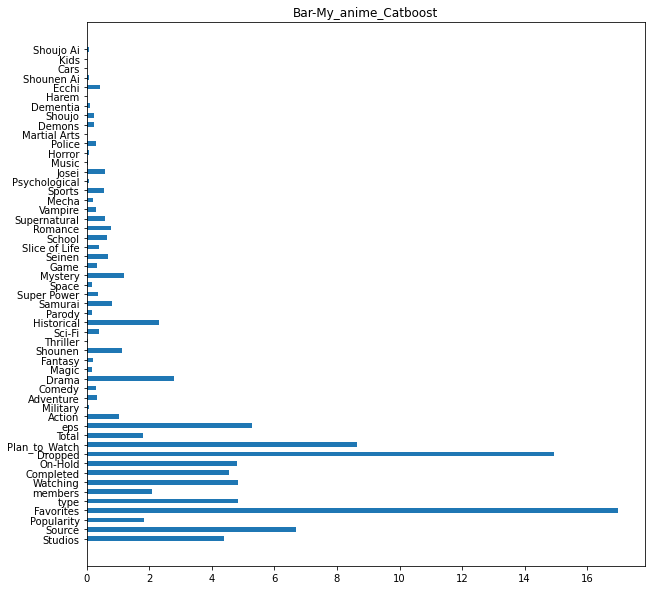

In [20]:
ap.plot_bar('My_anime_Catboost',fea_name,fea_,echarts=False)

In [21]:
ap.plot_bar('My_anime_Catboost',fea_name,fea_)

According to two graphs shown above,there are also three key factors that affect the anime score, which are **Favorites**,**Dropped** and **Plan_to_Watch**. And they are the same as Randomforest's result

## Model evaluation-get the Confidence interval 95% of these two models

In [22]:
from sklearn.model_selection import cross_val_score
mdl = RandomForestRegressor()
scoring = 'neg_mean_absolute_error'    #'r2'
scores = cross_val_score(mdl, x, y, cv=5, scoring=scoring)
miu = scores.mean()
delt =  scores.std()
print('\nmean:{0:.2f},std:{1:.2f}'.format(miu, delt))
print('Confidence interval%95：[{:.2f},{:.2f}]'.format(miu-2*delt, miu+2*delt))


mean:-0.23,std:0.12
Confidence interval%95：[-0.48,0.02]


**Note**: it will take several minutes to run code below

In [23]:
categorical_features_indices = np.where(pd.DataFrame(x2).dtypes != np.float)[0]#类别型特征
mdl = CatBoostRegressor(iterations=1000, depth=5,cat_features=categorical_features_indices,
                           learning_rate=0.1, loss_function='MAE',logging_level='Verbose')
scores = cross_val_score(mdl, x2, y2, cv=5, scoring=scoring)


0:	learn: 0.1483390	total: 46.2ms	remaining: 46.2s
1:	learn: 0.1466667	total: 94.1ms	remaining: 47s
2:	learn: 0.1452038	total: 129ms	remaining: 42.9s
3:	learn: 0.1434654	total: 170ms	remaining: 42.2s
4:	learn: 0.1425611	total: 213ms	remaining: 42.5s
5:	learn: 0.1413672	total: 264ms	remaining: 43.8s
6:	learn: 0.1402533	total: 313ms	remaining: 44.4s
7:	learn: 0.1391702	total: 357ms	remaining: 44.3s
8:	learn: 0.1377707	total: 405ms	remaining: 44.6s
9:	learn: 0.1368737	total: 446ms	remaining: 44.2s
10:	learn: 0.1362416	total: 490ms	remaining: 44.1s
11:	learn: 0.1355630	total: 539ms	remaining: 44.4s
12:	learn: 0.1351309	total: 583ms	remaining: 44.2s
13:	learn: 0.1347926	total: 623ms	remaining: 43.9s
14:	learn: 0.1342058	total: 665ms	remaining: 43.7s
15:	learn: 0.1335851	total: 712ms	remaining: 43.8s
16:	learn: 0.1327222	total: 760ms	remaining: 44s
17:	learn: 0.1317253	total: 806ms	remaining: 43.9s
18:	learn: 0.1308549	total: 846ms	remaining: 43.7s
19:	learn: 0.1303096	total: 888ms	remaining

161:	learn: 0.0808812	total: 7s	remaining: 36.2s
162:	learn: 0.0807837	total: 7.04s	remaining: 36.1s
163:	learn: 0.0806025	total: 7.08s	remaining: 36.1s
164:	learn: 0.0804847	total: 7.12s	remaining: 36s
165:	learn: 0.0803143	total: 7.15s	remaining: 35.9s
166:	learn: 0.0801393	total: 7.2s	remaining: 35.9s
167:	learn: 0.0800165	total: 7.24s	remaining: 35.8s
168:	learn: 0.0798589	total: 7.28s	remaining: 35.8s
169:	learn: 0.0797066	total: 7.32s	remaining: 35.7s
170:	learn: 0.0794949	total: 7.36s	remaining: 35.7s
171:	learn: 0.0792758	total: 7.4s	remaining: 35.6s
172:	learn: 0.0791545	total: 7.45s	remaining: 35.6s
173:	learn: 0.0788921	total: 7.49s	remaining: 35.5s
174:	learn: 0.0786772	total: 7.52s	remaining: 35.5s
175:	learn: 0.0785526	total: 7.57s	remaining: 35.4s
176:	learn: 0.0784287	total: 7.61s	remaining: 35.4s
177:	learn: 0.0781128	total: 7.65s	remaining: 35.3s
178:	learn: 0.0780399	total: 7.69s	remaining: 35.3s
179:	learn: 0.0779019	total: 7.73s	remaining: 35.2s
180:	learn: 0.07778

321:	learn: 0.0610113	total: 15.7s	remaining: 33s
322:	learn: 0.0609341	total: 15.8s	remaining: 33.1s
323:	learn: 0.0608641	total: 15.8s	remaining: 33s
324:	learn: 0.0608310	total: 16s	remaining: 33.1s
325:	learn: 0.0606458	total: 16.1s	remaining: 33.3s
326:	learn: 0.0605959	total: 16.2s	remaining: 33.4s
327:	learn: 0.0605101	total: 16.3s	remaining: 33.5s
328:	learn: 0.0603966	total: 16.4s	remaining: 33.4s
329:	learn: 0.0603197	total: 16.5s	remaining: 33.4s
330:	learn: 0.0602945	total: 16.5s	remaining: 33.4s
331:	learn: 0.0602073	total: 16.6s	remaining: 33.4s
332:	learn: 0.0601788	total: 16.7s	remaining: 33.4s
333:	learn: 0.0600940	total: 16.7s	remaining: 33.4s
334:	learn: 0.0599576	total: 16.8s	remaining: 33.4s
335:	learn: 0.0599122	total: 16.9s	remaining: 33.4s
336:	learn: 0.0598953	total: 17s	remaining: 33.4s
337:	learn: 0.0598346	total: 17.1s	remaining: 33.4s
338:	learn: 0.0597653	total: 17.2s	remaining: 33.5s
339:	learn: 0.0597514	total: 17.2s	remaining: 33.5s
340:	learn: 0.059708

480:	learn: 0.0499500	total: 28.8s	remaining: 31s
481:	learn: 0.0499279	total: 28.8s	remaining: 31s
482:	learn: 0.0498793	total: 28.9s	remaining: 30.9s
483:	learn: 0.0498054	total: 29s	remaining: 30.9s
484:	learn: 0.0497786	total: 29s	remaining: 30.8s
485:	learn: 0.0497447	total: 29.1s	remaining: 30.8s
486:	learn: 0.0497282	total: 29.2s	remaining: 30.7s
487:	learn: 0.0496764	total: 29.2s	remaining: 30.7s
488:	learn: 0.0496572	total: 29.3s	remaining: 30.6s
489:	learn: 0.0496192	total: 29.4s	remaining: 30.6s
490:	learn: 0.0495794	total: 29.4s	remaining: 30.5s
491:	learn: 0.0494054	total: 29.5s	remaining: 30.5s
492:	learn: 0.0493724	total: 29.6s	remaining: 30.4s
493:	learn: 0.0493660	total: 29.7s	remaining: 30.4s
494:	learn: 0.0493373	total: 29.8s	remaining: 30.4s
495:	learn: 0.0493085	total: 29.8s	remaining: 30.3s
496:	learn: 0.0493041	total: 29.9s	remaining: 30.3s
497:	learn: 0.0492559	total: 30s	remaining: 30.2s
498:	learn: 0.0492375	total: 30s	remaining: 30.2s
499:	learn: 0.0491877	to

641:	learn: 0.0436420	total: 41.8s	remaining: 23.3s
642:	learn: 0.0436353	total: 41.9s	remaining: 23.2s
643:	learn: 0.0435875	total: 41.9s	remaining: 23.2s
644:	learn: 0.0435783	total: 42s	remaining: 23.1s
645:	learn: 0.0435665	total: 42.1s	remaining: 23.1s
646:	learn: 0.0435379	total: 42.2s	remaining: 23s
647:	learn: 0.0435167	total: 42.2s	remaining: 22.9s
648:	learn: 0.0434972	total: 42.3s	remaining: 22.9s
649:	learn: 0.0434908	total: 42.4s	remaining: 22.8s
650:	learn: 0.0434438	total: 42.5s	remaining: 22.8s
651:	learn: 0.0434388	total: 42.5s	remaining: 22.7s
652:	learn: 0.0434086	total: 42.6s	remaining: 22.6s
653:	learn: 0.0433438	total: 42.7s	remaining: 22.6s
654:	learn: 0.0433228	total: 42.8s	remaining: 22.5s
655:	learn: 0.0433197	total: 42.8s	remaining: 22.5s
656:	learn: 0.0432488	total: 42.9s	remaining: 22.4s
657:	learn: 0.0432355	total: 43s	remaining: 22.3s
658:	learn: 0.0432260	total: 43.1s	remaining: 22.3s
659:	learn: 0.0432168	total: 43.1s	remaining: 22.2s
660:	learn: 0.0431

800:	learn: 0.0393385	total: 52.9s	remaining: 13.2s
801:	learn: 0.0392541	total: 53s	remaining: 13.1s
802:	learn: 0.0392180	total: 53.1s	remaining: 13s
803:	learn: 0.0391610	total: 53.1s	remaining: 12.9s
804:	learn: 0.0390765	total: 53.2s	remaining: 12.9s
805:	learn: 0.0390446	total: 53.2s	remaining: 12.8s
806:	learn: 0.0390335	total: 53.3s	remaining: 12.7s
807:	learn: 0.0390264	total: 53.3s	remaining: 12.7s
808:	learn: 0.0389659	total: 53.4s	remaining: 12.6s
809:	learn: 0.0389478	total: 53.4s	remaining: 12.5s
810:	learn: 0.0389280	total: 53.5s	remaining: 12.5s
811:	learn: 0.0389228	total: 53.6s	remaining: 12.4s
812:	learn: 0.0389101	total: 53.7s	remaining: 12.3s
813:	learn: 0.0388694	total: 53.7s	remaining: 12.3s
814:	learn: 0.0388327	total: 53.8s	remaining: 12.2s
815:	learn: 0.0387855	total: 53.9s	remaining: 12.1s
816:	learn: 0.0387766	total: 53.9s	remaining: 12.1s
817:	learn: 0.0387728	total: 54s	remaining: 12s
818:	learn: 0.0387387	total: 54.1s	remaining: 11.9s
819:	learn: 0.038721

963:	learn: 0.0354029	total: 1m 3s	remaining: 2.36s
964:	learn: 0.0353999	total: 1m 3s	remaining: 2.29s
965:	learn: 0.0353480	total: 1m 3s	remaining: 2.23s
966:	learn: 0.0353336	total: 1m 3s	remaining: 2.16s
967:	learn: 0.0353296	total: 1m 3s	remaining: 2.09s
968:	learn: 0.0353156	total: 1m 3s	remaining: 2.03s
969:	learn: 0.0353090	total: 1m 3s	remaining: 1.96s
970:	learn: 0.0352295	total: 1m 3s	remaining: 1.9s
971:	learn: 0.0352272	total: 1m 3s	remaining: 1.83s
972:	learn: 0.0351263	total: 1m 3s	remaining: 1.76s
973:	learn: 0.0351216	total: 1m 3s	remaining: 1.7s
974:	learn: 0.0351158	total: 1m 3s	remaining: 1.64s
975:	learn: 0.0351132	total: 1m 3s	remaining: 1.57s
976:	learn: 0.0350896	total: 1m 3s	remaining: 1.5s
977:	learn: 0.0350876	total: 1m 4s	remaining: 1.44s
978:	learn: 0.0350640	total: 1m 4s	remaining: 1.37s
979:	learn: 0.0350158	total: 1m 4s	remaining: 1.31s
980:	learn: 0.0350098	total: 1m 4s	remaining: 1.24s
981:	learn: 0.0350054	total: 1m 4s	remaining: 1.18s
982:	learn: 0.0

127:	learn: 0.1026631	total: 8.98s	remaining: 1m 1s
128:	learn: 0.1021094	total: 9.07s	remaining: 1m 1s
129:	learn: 0.1017430	total: 9.14s	remaining: 1m 1s
130:	learn: 0.1014352	total: 9.2s	remaining: 1m 1s
131:	learn: 0.1012188	total: 9.25s	remaining: 1m
132:	learn: 0.1008837	total: 9.3s	remaining: 1m
133:	learn: 0.1004719	total: 9.36s	remaining: 1m
134:	learn: 0.1003629	total: 9.42s	remaining: 1m
135:	learn: 0.1000932	total: 9.49s	remaining: 1m
136:	learn: 0.0995562	total: 9.54s	remaining: 1m
137:	learn: 0.0992580	total: 9.6s	remaining: 60s
138:	learn: 0.0990858	total: 9.67s	remaining: 59.9s
139:	learn: 0.0989391	total: 9.75s	remaining: 59.9s
140:	learn: 0.0987788	total: 9.83s	remaining: 59.9s
141:	learn: 0.0986039	total: 9.9s	remaining: 59.8s
142:	learn: 0.0978367	total: 9.98s	remaining: 59.8s
143:	learn: 0.0973674	total: 10.1s	remaining: 59.8s
144:	learn: 0.0972254	total: 10.1s	remaining: 59.7s
145:	learn: 0.0970644	total: 10.2s	remaining: 59.6s
146:	learn: 0.0965171	total: 10.3s	r

287:	learn: 0.0743701	total: 20.6s	remaining: 50.9s
288:	learn: 0.0743015	total: 20.7s	remaining: 50.8s
289:	learn: 0.0742507	total: 20.7s	remaining: 50.7s
290:	learn: 0.0742105	total: 20.8s	remaining: 50.6s
291:	learn: 0.0741063	total: 20.8s	remaining: 50.5s
292:	learn: 0.0738067	total: 20.9s	remaining: 50.5s
293:	learn: 0.0737158	total: 21s	remaining: 50.5s
294:	learn: 0.0735018	total: 21.1s	remaining: 50.4s
295:	learn: 0.0734589	total: 21.1s	remaining: 50.3s
296:	learn: 0.0734181	total: 21.2s	remaining: 50.2s
297:	learn: 0.0732686	total: 21.3s	remaining: 50.1s
298:	learn: 0.0732600	total: 21.3s	remaining: 49.9s
299:	learn: 0.0730290	total: 21.4s	remaining: 49.8s
300:	learn: 0.0729005	total: 21.4s	remaining: 49.7s
301:	learn: 0.0727464	total: 21.5s	remaining: 49.6s
302:	learn: 0.0724843	total: 21.5s	remaining: 49.5s
303:	learn: 0.0724414	total: 21.6s	remaining: 49.4s
304:	learn: 0.0723124	total: 21.6s	remaining: 49.3s
305:	learn: 0.0722219	total: 21.7s	remaining: 49.2s
306:	learn: 0.

446:	learn: 0.0600880	total: 31.5s	remaining: 39s
447:	learn: 0.0599420	total: 31.6s	remaining: 38.9s
448:	learn: 0.0599154	total: 31.7s	remaining: 38.9s
449:	learn: 0.0599051	total: 31.7s	remaining: 38.8s
450:	learn: 0.0598757	total: 31.8s	remaining: 38.7s
451:	learn: 0.0598469	total: 31.9s	remaining: 38.7s
452:	learn: 0.0598125	total: 32s	remaining: 38.6s
453:	learn: 0.0597019	total: 32s	remaining: 38.5s
454:	learn: 0.0596182	total: 32.1s	remaining: 38.5s
455:	learn: 0.0596122	total: 32.2s	remaining: 38.4s
456:	learn: 0.0595850	total: 32.2s	remaining: 38.3s
457:	learn: 0.0595362	total: 32.3s	remaining: 38.2s
458:	learn: 0.0594276	total: 32.4s	remaining: 38.2s
459:	learn: 0.0593824	total: 32.4s	remaining: 38.1s
460:	learn: 0.0593289	total: 32.5s	remaining: 38s
461:	learn: 0.0592608	total: 32.6s	remaining: 37.9s
462:	learn: 0.0592414	total: 32.7s	remaining: 37.9s
463:	learn: 0.0591674	total: 32.7s	remaining: 37.8s
464:	learn: 0.0591616	total: 32.8s	remaining: 37.7s
465:	learn: 0.059155

608:	learn: 0.0521225	total: 42.9s	remaining: 27.5s
609:	learn: 0.0521051	total: 42.9s	remaining: 27.4s
610:	learn: 0.0520862	total: 43s	remaining: 27.4s
611:	learn: 0.0520660	total: 43.1s	remaining: 27.3s
612:	learn: 0.0519646	total: 43.1s	remaining: 27.2s
613:	learn: 0.0519442	total: 43.2s	remaining: 27.2s
614:	learn: 0.0518832	total: 43.3s	remaining: 27.1s
615:	learn: 0.0518418	total: 43.3s	remaining: 27s
616:	learn: 0.0517851	total: 43.4s	remaining: 27s
617:	learn: 0.0517724	total: 43.5s	remaining: 26.9s
618:	learn: 0.0516738	total: 43.6s	remaining: 26.9s
619:	learn: 0.0516308	total: 43.7s	remaining: 26.8s
620:	learn: 0.0515801	total: 43.8s	remaining: 26.7s
621:	learn: 0.0515614	total: 43.9s	remaining: 26.7s
622:	learn: 0.0515100	total: 44s	remaining: 26.6s
623:	learn: 0.0515072	total: 44s	remaining: 26.5s
624:	learn: 0.0515061	total: 44.1s	remaining: 26.5s
625:	learn: 0.0514782	total: 44.2s	remaining: 26.4s
626:	learn: 0.0514623	total: 44.3s	remaining: 26.4s
627:	learn: 0.0514457	

768:	learn: 0.0462749	total: 54.7s	remaining: 16.4s
769:	learn: 0.0462516	total: 54.7s	remaining: 16.4s
770:	learn: 0.0462453	total: 54.8s	remaining: 16.3s
771:	learn: 0.0462136	total: 54.9s	remaining: 16.2s
772:	learn: 0.0461282	total: 55s	remaining: 16.1s
773:	learn: 0.0461024	total: 55s	remaining: 16.1s
774:	learn: 0.0460241	total: 55.1s	remaining: 16s
775:	learn: 0.0460037	total: 55.2s	remaining: 15.9s
776:	learn: 0.0459599	total: 55.2s	remaining: 15.8s
777:	learn: 0.0459498	total: 55.3s	remaining: 15.8s
778:	learn: 0.0459451	total: 55.3s	remaining: 15.7s
779:	learn: 0.0458550	total: 55.4s	remaining: 15.6s
780:	learn: 0.0458417	total: 55.5s	remaining: 15.6s
781:	learn: 0.0458401	total: 55.5s	remaining: 15.5s
782:	learn: 0.0458278	total: 55.6s	remaining: 15.4s
783:	learn: 0.0457677	total: 55.7s	remaining: 15.3s
784:	learn: 0.0457564	total: 55.7s	remaining: 15.3s
785:	learn: 0.0457431	total: 55.8s	remaining: 15.2s
786:	learn: 0.0457370	total: 55.9s	remaining: 15.1s
787:	learn: 0.0457

928:	learn: 0.0416474	total: 1m 6s	remaining: 5.06s
929:	learn: 0.0416342	total: 1m 6s	remaining: 4.99s
930:	learn: 0.0415653	total: 1m 6s	remaining: 4.91s
931:	learn: 0.0415323	total: 1m 6s	remaining: 4.84s
932:	learn: 0.0415108	total: 1m 6s	remaining: 4.77s
933:	learn: 0.0415013	total: 1m 6s	remaining: 4.7s
934:	learn: 0.0414957	total: 1m 6s	remaining: 4.63s
935:	learn: 0.0414924	total: 1m 6s	remaining: 4.56s
936:	learn: 0.0414851	total: 1m 6s	remaining: 4.49s
937:	learn: 0.0414610	total: 1m 6s	remaining: 4.41s
938:	learn: 0.0414119	total: 1m 6s	remaining: 4.34s
939:	learn: 0.0413831	total: 1m 6s	remaining: 4.27s
940:	learn: 0.0413787	total: 1m 6s	remaining: 4.2s
941:	learn: 0.0413646	total: 1m 7s	remaining: 4.13s
942:	learn: 0.0413491	total: 1m 7s	remaining: 4.06s
943:	learn: 0.0413284	total: 1m 7s	remaining: 3.98s
944:	learn: 0.0413196	total: 1m 7s	remaining: 3.92s
945:	learn: 0.0413079	total: 1m 7s	remaining: 3.85s
946:	learn: 0.0412984	total: 1m 7s	remaining: 3.77s
947:	learn: 0.

88:	learn: 0.1280762	total: 5.64s	remaining: 57.7s
89:	learn: 0.1274668	total: 5.7s	remaining: 57.7s
90:	learn: 0.1265501	total: 5.76s	remaining: 57.5s
91:	learn: 0.1258276	total: 5.82s	remaining: 57.5s
92:	learn: 0.1253009	total: 5.88s	remaining: 57.3s
93:	learn: 0.1243904	total: 5.93s	remaining: 57.2s
94:	learn: 0.1236837	total: 5.99s	remaining: 57s
95:	learn: 0.1230102	total: 6.04s	remaining: 56.9s
96:	learn: 0.1223386	total: 6.1s	remaining: 56.8s
97:	learn: 0.1214189	total: 6.16s	remaining: 56.7s
98:	learn: 0.1205842	total: 6.22s	remaining: 56.6s
99:	learn: 0.1197603	total: 6.27s	remaining: 56.5s
100:	learn: 0.1189619	total: 6.35s	remaining: 56.5s
101:	learn: 0.1183664	total: 6.4s	remaining: 56.4s
102:	learn: 0.1176028	total: 6.47s	remaining: 56.3s
103:	learn: 0.1169566	total: 6.53s	remaining: 56.3s
104:	learn: 0.1164145	total: 6.58s	remaining: 56.1s
105:	learn: 0.1158267	total: 6.64s	remaining: 56s
106:	learn: 0.1152262	total: 6.7s	remaining: 55.9s
107:	learn: 0.1150687	total: 6.7

247:	learn: 0.0815909	total: 16.8s	remaining: 50.8s
248:	learn: 0.0813947	total: 16.8s	remaining: 50.8s
249:	learn: 0.0813350	total: 16.9s	remaining: 50.7s
250:	learn: 0.0811033	total: 16.9s	remaining: 50.5s
251:	learn: 0.0808785	total: 17s	remaining: 50.5s
252:	learn: 0.0808234	total: 17.1s	remaining: 50.4s
253:	learn: 0.0805966	total: 17.2s	remaining: 50.5s
254:	learn: 0.0803984	total: 17.3s	remaining: 50.6s
255:	learn: 0.0801946	total: 17.4s	remaining: 50.6s
256:	learn: 0.0800401	total: 17.5s	remaining: 50.5s
257:	learn: 0.0799219	total: 17.5s	remaining: 50.5s
258:	learn: 0.0795669	total: 17.6s	remaining: 50.4s
259:	learn: 0.0794649	total: 17.7s	remaining: 50.4s
260:	learn: 0.0794078	total: 17.8s	remaining: 50.3s
261:	learn: 0.0791960	total: 17.8s	remaining: 50.3s
262:	learn: 0.0790807	total: 17.9s	remaining: 50.3s
263:	learn: 0.0790040	total: 18s	remaining: 50.2s
264:	learn: 0.0789051	total: 18s	remaining: 50s
265:	learn: 0.0786059	total: 18.1s	remaining: 49.9s
266:	learn: 0.078401

407:	learn: 0.0657325	total: 28.5s	remaining: 41.3s
408:	learn: 0.0656676	total: 28.5s	remaining: 41.2s
409:	learn: 0.0655675	total: 28.6s	remaining: 41.2s
410:	learn: 0.0655426	total: 28.7s	remaining: 41.1s
411:	learn: 0.0653906	total: 28.7s	remaining: 41s
412:	learn: 0.0653427	total: 28.8s	remaining: 40.9s
413:	learn: 0.0653253	total: 28.9s	remaining: 40.9s
414:	learn: 0.0652025	total: 29s	remaining: 40.8s
415:	learn: 0.0651233	total: 29s	remaining: 40.7s
416:	learn: 0.0650793	total: 29.1s	remaining: 40.7s
417:	learn: 0.0649433	total: 29.2s	remaining: 40.6s
418:	learn: 0.0648604	total: 29.2s	remaining: 40.5s
419:	learn: 0.0648100	total: 29.3s	remaining: 40.5s
420:	learn: 0.0647550	total: 29.4s	remaining: 40.4s
421:	learn: 0.0647223	total: 29.4s	remaining: 40.3s
422:	learn: 0.0647104	total: 29.5s	remaining: 40.2s
423:	learn: 0.0646113	total: 29.5s	remaining: 40.1s
424:	learn: 0.0645547	total: 29.6s	remaining: 40s
425:	learn: 0.0643836	total: 29.7s	remaining: 40s
426:	learn: 0.0642469	

567:	learn: 0.0558552	total: 39.2s	remaining: 29.8s
568:	learn: 0.0557922	total: 39.2s	remaining: 29.7s
569:	learn: 0.0557195	total: 39.3s	remaining: 29.6s
570:	learn: 0.0556692	total: 39.4s	remaining: 29.6s
571:	learn: 0.0556545	total: 39.5s	remaining: 29.5s
572:	learn: 0.0556434	total: 39.6s	remaining: 29.5s
573:	learn: 0.0556196	total: 39.7s	remaining: 29.4s
574:	learn: 0.0556001	total: 39.8s	remaining: 29.4s
575:	learn: 0.0555658	total: 39.8s	remaining: 29.3s
576:	learn: 0.0555137	total: 39.9s	remaining: 29.3s
577:	learn: 0.0554903	total: 40s	remaining: 29.2s
578:	learn: 0.0554604	total: 40.2s	remaining: 29.2s
579:	learn: 0.0554270	total: 40.3s	remaining: 29.2s
580:	learn: 0.0554227	total: 40.4s	remaining: 29.1s
581:	learn: 0.0554149	total: 40.4s	remaining: 29.1s
582:	learn: 0.0554051	total: 40.5s	remaining: 29s
583:	learn: 0.0553894	total: 40.6s	remaining: 28.9s
584:	learn: 0.0553646	total: 40.7s	remaining: 28.8s
585:	learn: 0.0553447	total: 40.7s	remaining: 28.8s
586:	learn: 0.05

726:	learn: 0.0506646	total: 51.1s	remaining: 19.2s
727:	learn: 0.0506376	total: 51.2s	remaining: 19.1s
728:	learn: 0.0506179	total: 51.3s	remaining: 19.1s
729:	learn: 0.0505963	total: 51.3s	remaining: 19s
730:	learn: 0.0505921	total: 51.4s	remaining: 18.9s
731:	learn: 0.0505812	total: 51.5s	remaining: 18.8s
732:	learn: 0.0505754	total: 51.6s	remaining: 18.8s
733:	learn: 0.0505747	total: 51.7s	remaining: 18.7s
734:	learn: 0.0505685	total: 51.7s	remaining: 18.7s
735:	learn: 0.0505485	total: 51.8s	remaining: 18.6s
736:	learn: 0.0505195	total: 51.9s	remaining: 18.5s
737:	learn: 0.0505148	total: 52s	remaining: 18.4s
738:	learn: 0.0505081	total: 52s	remaining: 18.4s
739:	learn: 0.0505053	total: 52.1s	remaining: 18.3s
740:	learn: 0.0505035	total: 52.2s	remaining: 18.2s
741:	learn: 0.0504902	total: 52.2s	remaining: 18.2s
742:	learn: 0.0504568	total: 52.3s	remaining: 18.1s
743:	learn: 0.0504560	total: 52.3s	remaining: 18s
744:	learn: 0.0504543	total: 52.5s	remaining: 18s
745:	learn: 0.0504112	

889:	learn: 0.0466087	total: 1m 1s	remaining: 7.59s
890:	learn: 0.0465494	total: 1m 1s	remaining: 7.51s
891:	learn: 0.0465391	total: 1m 1s	remaining: 7.44s
892:	learn: 0.0465158	total: 1m 1s	remaining: 7.37s
893:	learn: 0.0465098	total: 1m 1s	remaining: 7.3s
894:	learn: 0.0465018	total: 1m 1s	remaining: 7.23s
895:	learn: 0.0464429	total: 1m 1s	remaining: 7.15s
896:	learn: 0.0464198	total: 1m 1s	remaining: 7.08s
897:	learn: 0.0464154	total: 1m 1s	remaining: 7.01s
898:	learn: 0.0463846	total: 1m 1s	remaining: 6.94s
899:	learn: 0.0463748	total: 1m 1s	remaining: 6.87s
900:	learn: 0.0463664	total: 1m 1s	remaining: 6.79s
901:	learn: 0.0463564	total: 1m 1s	remaining: 6.72s
902:	learn: 0.0463501	total: 1m 1s	remaining: 6.65s
903:	learn: 0.0463415	total: 1m 1s	remaining: 6.58s
904:	learn: 0.0463285	total: 1m 2s	remaining: 6.51s
905:	learn: 0.0460492	total: 1m 2s	remaining: 6.44s
906:	learn: 0.0460076	total: 1m 2s	remaining: 6.37s
907:	learn: 0.0460034	total: 1m 2s	remaining: 6.29s
908:	learn: 0

51:	learn: 0.1590860	total: 2.15s	remaining: 39.2s
52:	learn: 0.1587273	total: 2.19s	remaining: 39.2s
53:	learn: 0.1576144	total: 2.23s	remaining: 39.1s
54:	learn: 0.1567692	total: 2.27s	remaining: 39s
55:	learn: 0.1561474	total: 2.31s	remaining: 38.9s
56:	learn: 0.1550668	total: 2.35s	remaining: 38.9s
57:	learn: 0.1544147	total: 2.39s	remaining: 38.8s
58:	learn: 0.1539267	total: 2.43s	remaining: 38.7s
59:	learn: 0.1534076	total: 2.47s	remaining: 38.7s
60:	learn: 0.1527489	total: 2.51s	remaining: 38.6s
61:	learn: 0.1516230	total: 2.55s	remaining: 38.6s
62:	learn: 0.1510145	total: 2.59s	remaining: 38.5s
63:	learn: 0.1503051	total: 2.63s	remaining: 38.4s
64:	learn: 0.1498343	total: 2.67s	remaining: 38.4s
65:	learn: 0.1491190	total: 2.71s	remaining: 38.3s
66:	learn: 0.1485134	total: 2.75s	remaining: 38.3s
67:	learn: 0.1482168	total: 2.79s	remaining: 38.2s
68:	learn: 0.1473109	total: 2.83s	remaining: 38.2s
69:	learn: 0.1464265	total: 2.87s	remaining: 38.1s
70:	learn: 0.1460021	total: 2.9s	

211:	learn: 0.0914797	total: 8.78s	remaining: 32.6s
212:	learn: 0.0910274	total: 8.82s	remaining: 32.6s
213:	learn: 0.0909110	total: 8.86s	remaining: 32.5s
214:	learn: 0.0907539	total: 8.89s	remaining: 32.5s
215:	learn: 0.0904142	total: 8.93s	remaining: 32.4s
216:	learn: 0.0902017	total: 8.98s	remaining: 32.4s
217:	learn: 0.0900703	total: 9.02s	remaining: 32.4s
218:	learn: 0.0898551	total: 9.06s	remaining: 32.3s
219:	learn: 0.0896492	total: 9.1s	remaining: 32.3s
220:	learn: 0.0894069	total: 9.14s	remaining: 32.2s
221:	learn: 0.0892882	total: 9.18s	remaining: 32.2s
222:	learn: 0.0890619	total: 9.22s	remaining: 32.1s
223:	learn: 0.0889680	total: 9.26s	remaining: 32.1s
224:	learn: 0.0887784	total: 9.3s	remaining: 32s
225:	learn: 0.0887040	total: 9.34s	remaining: 32s
226:	learn: 0.0880708	total: 9.38s	remaining: 32s
227:	learn: 0.0879054	total: 9.42s	remaining: 31.9s
228:	learn: 0.0877952	total: 9.46s	remaining: 31.9s
229:	learn: 0.0873835	total: 9.5s	remaining: 31.8s
230:	learn: 0.0872671

371:	learn: 0.0700574	total: 15.3s	remaining: 25.8s
372:	learn: 0.0698652	total: 15.3s	remaining: 25.7s
373:	learn: 0.0698257	total: 15.3s	remaining: 25.7s
374:	learn: 0.0697860	total: 15.4s	remaining: 25.6s
375:	learn: 0.0696256	total: 15.4s	remaining: 25.6s
376:	learn: 0.0695851	total: 15.5s	remaining: 25.6s
377:	learn: 0.0693019	total: 15.5s	remaining: 25.5s
378:	learn: 0.0692299	total: 15.6s	remaining: 25.5s
379:	learn: 0.0690930	total: 15.6s	remaining: 25.4s
380:	learn: 0.0690477	total: 15.6s	remaining: 25.4s
381:	learn: 0.0690097	total: 15.7s	remaining: 25.4s
382:	learn: 0.0688377	total: 15.7s	remaining: 25.3s
383:	learn: 0.0687163	total: 15.8s	remaining: 25.3s
384:	learn: 0.0685368	total: 15.8s	remaining: 25.2s
385:	learn: 0.0684541	total: 15.8s	remaining: 25.2s
386:	learn: 0.0682566	total: 15.9s	remaining: 25.2s
387:	learn: 0.0682465	total: 15.9s	remaining: 25.1s
388:	learn: 0.0682378	total: 16s	remaining: 25.1s
389:	learn: 0.0681760	total: 16s	remaining: 25s
390:	learn: 0.0678

532:	learn: 0.0587391	total: 21.9s	remaining: 19.2s
533:	learn: 0.0586181	total: 21.9s	remaining: 19.1s
534:	learn: 0.0585825	total: 22s	remaining: 19.1s
535:	learn: 0.0585539	total: 22s	remaining: 19.1s
536:	learn: 0.0585255	total: 22.1s	remaining: 19s
537:	learn: 0.0584620	total: 22.1s	remaining: 19s
538:	learn: 0.0584349	total: 22.1s	remaining: 18.9s
539:	learn: 0.0584067	total: 22.2s	remaining: 18.9s
540:	learn: 0.0582299	total: 22.2s	remaining: 18.8s
541:	learn: 0.0581016	total: 22.3s	remaining: 18.8s
542:	learn: 0.0580446	total: 22.3s	remaining: 18.8s
543:	learn: 0.0579644	total: 22.3s	remaining: 18.7s
544:	learn: 0.0578921	total: 22.4s	remaining: 18.7s
545:	learn: 0.0578626	total: 22.4s	remaining: 18.6s
546:	learn: 0.0577832	total: 22.5s	remaining: 18.6s
547:	learn: 0.0577314	total: 22.5s	remaining: 18.6s
548:	learn: 0.0575841	total: 22.5s	remaining: 18.5s
549:	learn: 0.0575742	total: 22.6s	remaining: 18.5s
550:	learn: 0.0575590	total: 22.6s	remaining: 18.4s
551:	learn: 0.057487

694:	learn: 0.0519086	total: 28.7s	remaining: 12.6s
695:	learn: 0.0518785	total: 28.8s	remaining: 12.6s
696:	learn: 0.0518645	total: 28.8s	remaining: 12.5s
697:	learn: 0.0518576	total: 28.9s	remaining: 12.5s
698:	learn: 0.0518484	total: 28.9s	remaining: 12.5s
699:	learn: 0.0518134	total: 29s	remaining: 12.4s
700:	learn: 0.0518007	total: 29s	remaining: 12.4s
701:	learn: 0.0517883	total: 29.1s	remaining: 12.3s
702:	learn: 0.0517737	total: 29.1s	remaining: 12.3s
703:	learn: 0.0517662	total: 29.1s	remaining: 12.2s
704:	learn: 0.0517445	total: 29.2s	remaining: 12.2s
705:	learn: 0.0515687	total: 29.2s	remaining: 12.2s
706:	learn: 0.0515485	total: 29.3s	remaining: 12.1s
707:	learn: 0.0514992	total: 29.3s	remaining: 12.1s
708:	learn: 0.0514922	total: 29.3s	remaining: 12s
709:	learn: 0.0514796	total: 29.4s	remaining: 12s
710:	learn: 0.0514551	total: 29.4s	remaining: 12s
711:	learn: 0.0514081	total: 29.5s	remaining: 11.9s
712:	learn: 0.0513844	total: 29.5s	remaining: 11.9s
713:	learn: 0.0513481	

855:	learn: 0.0467491	total: 36s	remaining: 6.06s
856:	learn: 0.0466684	total: 36.1s	remaining: 6.01s
857:	learn: 0.0466088	total: 36.1s	remaining: 5.97s
858:	learn: 0.0466073	total: 36.1s	remaining: 5.93s
859:	learn: 0.0465941	total: 36.2s	remaining: 5.89s
860:	learn: 0.0465832	total: 36.2s	remaining: 5.85s
861:	learn: 0.0465790	total: 36.3s	remaining: 5.8s
862:	learn: 0.0465511	total: 36.3s	remaining: 5.76s
863:	learn: 0.0465082	total: 36.3s	remaining: 5.72s
864:	learn: 0.0465020	total: 36.4s	remaining: 5.68s
865:	learn: 0.0464899	total: 36.4s	remaining: 5.64s
866:	learn: 0.0464525	total: 36.5s	remaining: 5.59s
867:	learn: 0.0464162	total: 36.5s	remaining: 5.55s
868:	learn: 0.0463534	total: 36.5s	remaining: 5.51s
869:	learn: 0.0462795	total: 36.6s	remaining: 5.47s
870:	learn: 0.0462658	total: 36.6s	remaining: 5.42s
871:	learn: 0.0462632	total: 36.7s	remaining: 5.38s
872:	learn: 0.0462007	total: 36.7s	remaining: 5.34s
873:	learn: 0.0461844	total: 36.8s	remaining: 5.3s
874:	learn: 0.04

14:	learn: 0.1742864	total: 644ms	remaining: 42.3s
15:	learn: 0.1731682	total: 686ms	remaining: 42.2s
16:	learn: 0.1718684	total: 726ms	remaining: 42s
17:	learn: 0.1705167	total: 768ms	remaining: 41.9s
18:	learn: 0.1690992	total: 812ms	remaining: 41.9s
19:	learn: 0.1678547	total: 859ms	remaining: 42.1s
20:	learn: 0.1665758	total: 904ms	remaining: 42.2s
21:	learn: 0.1650748	total: 947ms	remaining: 42.1s
22:	learn: 0.1640569	total: 987ms	remaining: 41.9s
23:	learn: 0.1634761	total: 1.03s	remaining: 41.9s
24:	learn: 0.1618873	total: 1.07s	remaining: 41.7s
25:	learn: 0.1606122	total: 1.11s	remaining: 41.5s
26:	learn: 0.1596652	total: 1.15s	remaining: 41.3s
27:	learn: 0.1591765	total: 1.19s	remaining: 41.2s
28:	learn: 0.1582449	total: 1.23s	remaining: 41.1s
29:	learn: 0.1573070	total: 1.27s	remaining: 41s
30:	learn: 0.1563724	total: 1.33s	remaining: 41.6s
31:	learn: 0.1558493	total: 1.38s	remaining: 41.9s
32:	learn: 0.1543170	total: 1.46s	remaining: 42.7s
33:	learn: 0.1535887	total: 1.51s	r

177:	learn: 0.0873237	total: 7.69s	remaining: 35.5s
178:	learn: 0.0872295	total: 7.74s	remaining: 35.5s
179:	learn: 0.0870371	total: 7.78s	remaining: 35.4s
180:	learn: 0.0867995	total: 7.82s	remaining: 35.4s
181:	learn: 0.0865884	total: 7.86s	remaining: 35.3s
182:	learn: 0.0864601	total: 7.9s	remaining: 35.3s
183:	learn: 0.0863394	total: 7.94s	remaining: 35.2s
184:	learn: 0.0862553	total: 7.98s	remaining: 35.2s
185:	learn: 0.0860974	total: 8.02s	remaining: 35.1s
186:	learn: 0.0860053	total: 8.06s	remaining: 35s
187:	learn: 0.0857957	total: 8.1s	remaining: 35s
188:	learn: 0.0854649	total: 8.14s	remaining: 34.9s
189:	learn: 0.0853580	total: 8.18s	remaining: 34.9s
190:	learn: 0.0852709	total: 8.22s	remaining: 34.8s
191:	learn: 0.0850307	total: 8.26s	remaining: 34.8s
192:	learn: 0.0848255	total: 8.3s	remaining: 34.7s
193:	learn: 0.0847298	total: 8.34s	remaining: 34.6s
194:	learn: 0.0846076	total: 8.38s	remaining: 34.6s
195:	learn: 0.0843824	total: 8.41s	remaining: 34.5s
196:	learn: 0.08426

337:	learn: 0.0651988	total: 17.5s	remaining: 34.2s
338:	learn: 0.0648815	total: 17.6s	remaining: 34.3s
339:	learn: 0.0648474	total: 17.6s	remaining: 34.2s
340:	learn: 0.0648067	total: 17.7s	remaining: 34.2s
341:	learn: 0.0647074	total: 17.8s	remaining: 34.2s
342:	learn: 0.0646795	total: 17.8s	remaining: 34.2s
343:	learn: 0.0645748	total: 17.9s	remaining: 34.1s
344:	learn: 0.0645546	total: 18s	remaining: 34.1s
345:	learn: 0.0645433	total: 18.1s	remaining: 34.2s
346:	learn: 0.0643093	total: 18.2s	remaining: 34.2s
347:	learn: 0.0642286	total: 18.2s	remaining: 34.1s
348:	learn: 0.0640678	total: 18.3s	remaining: 34.1s
349:	learn: 0.0640586	total: 18.4s	remaining: 34.1s
350:	learn: 0.0639246	total: 18.4s	remaining: 34s
351:	learn: 0.0638192	total: 18.5s	remaining: 34s
352:	learn: 0.0637770	total: 18.6s	remaining: 34s
353:	learn: 0.0636602	total: 18.6s	remaining: 34s
354:	learn: 0.0635325	total: 18.7s	remaining: 33.9s
355:	learn: 0.0634533	total: 18.7s	remaining: 33.9s
356:	learn: 0.0634106	

499:	learn: 0.0523212	total: 30.3s	remaining: 30.3s
500:	learn: 0.0523069	total: 30.4s	remaining: 30.3s
501:	learn: 0.0522249	total: 30.5s	remaining: 30.2s
502:	learn: 0.0521630	total: 30.6s	remaining: 30.2s
503:	learn: 0.0521482	total: 30.6s	remaining: 30.1s
504:	learn: 0.0521190	total: 30.7s	remaining: 30.1s
505:	learn: 0.0521043	total: 30.8s	remaining: 30s
506:	learn: 0.0520799	total: 30.9s	remaining: 30s
507:	learn: 0.0520286	total: 31s	remaining: 30s
508:	learn: 0.0519185	total: 31s	remaining: 29.9s
509:	learn: 0.0519051	total: 31.1s	remaining: 29.9s
510:	learn: 0.0518826	total: 31.2s	remaining: 29.8s
511:	learn: 0.0518616	total: 31.2s	remaining: 29.8s
512:	learn: 0.0518084	total: 31.3s	remaining: 29.7s
513:	learn: 0.0517505	total: 31.5s	remaining: 29.7s
514:	learn: 0.0516834	total: 31.6s	remaining: 29.7s
515:	learn: 0.0516092	total: 31.7s	remaining: 29.7s
516:	learn: 0.0515968	total: 31.8s	remaining: 29.7s
517:	learn: 0.0515673	total: 31.9s	remaining: 29.7s
518:	learn: 0.0513809	

659:	learn: 0.0456874	total: 42.5s	remaining: 21.9s
660:	learn: 0.0456746	total: 42.6s	remaining: 21.8s
661:	learn: 0.0456154	total: 42.7s	remaining: 21.8s
662:	learn: 0.0455864	total: 42.7s	remaining: 21.7s
663:	learn: 0.0455834	total: 42.8s	remaining: 21.7s
664:	learn: 0.0455476	total: 42.9s	remaining: 21.6s
665:	learn: 0.0454964	total: 43s	remaining: 21.5s
666:	learn: 0.0454438	total: 43s	remaining: 21.5s
667:	learn: 0.0454210	total: 43.1s	remaining: 21.4s
668:	learn: 0.0453942	total: 43.2s	remaining: 21.4s
669:	learn: 0.0453915	total: 43.2s	remaining: 21.3s
670:	learn: 0.0453565	total: 43.3s	remaining: 21.2s
671:	learn: 0.0453228	total: 43.4s	remaining: 21.2s
672:	learn: 0.0452450	total: 43.4s	remaining: 21.1s
673:	learn: 0.0452014	total: 43.5s	remaining: 21s
674:	learn: 0.0451956	total: 43.5s	remaining: 21s
675:	learn: 0.0451079	total: 43.6s	remaining: 20.9s
676:	learn: 0.0450949	total: 43.7s	remaining: 20.8s
677:	learn: 0.0450819	total: 43.8s	remaining: 20.8s
678:	learn: 0.045063

820:	learn: 0.0404452	total: 54.9s	remaining: 12s
821:	learn: 0.0404238	total: 55s	remaining: 11.9s
822:	learn: 0.0403970	total: 55s	remaining: 11.8s
823:	learn: 0.0403928	total: 55.1s	remaining: 11.8s
824:	learn: 0.0403892	total: 55.2s	remaining: 11.7s
825:	learn: 0.0403776	total: 55.3s	remaining: 11.6s
826:	learn: 0.0403509	total: 55.3s	remaining: 11.6s
827:	learn: 0.0403164	total: 55.4s	remaining: 11.5s
828:	learn: 0.0402778	total: 55.5s	remaining: 11.4s
829:	learn: 0.0402534	total: 55.5s	remaining: 11.4s
830:	learn: 0.0402494	total: 55.6s	remaining: 11.3s
831:	learn: 0.0402403	total: 55.6s	remaining: 11.2s
832:	learn: 0.0402384	total: 55.7s	remaining: 11.2s
833:	learn: 0.0402259	total: 55.8s	remaining: 11.1s
834:	learn: 0.0402189	total: 55.8s	remaining: 11s
835:	learn: 0.0401839	total: 55.9s	remaining: 11s
836:	learn: 0.0401680	total: 56s	remaining: 10.9s
837:	learn: 0.0401249	total: 56s	remaining: 10.8s
838:	learn: 0.0401103	total: 56.1s	remaining: 10.8s
839:	learn: 0.0400823	tota

982:	learn: 0.0371107	total: 1m 6s	remaining: 1.14s
983:	learn: 0.0370843	total: 1m 6s	remaining: 1.07s
984:	learn: 0.0370450	total: 1m 6s	remaining: 1.01s
985:	learn: 0.0370291	total: 1m 6s	remaining: 941ms
986:	learn: 0.0370179	total: 1m 6s	remaining: 874ms
987:	learn: 0.0370167	total: 1m 6s	remaining: 806ms
988:	learn: 0.0369751	total: 1m 6s	remaining: 739ms
989:	learn: 0.0368951	total: 1m 6s	remaining: 672ms
990:	learn: 0.0368713	total: 1m 6s	remaining: 605ms
991:	learn: 0.0368609	total: 1m 6s	remaining: 537ms
992:	learn: 0.0368402	total: 1m 6s	remaining: 470ms
993:	learn: 0.0368118	total: 1m 6s	remaining: 403ms
994:	learn: 0.0367639	total: 1m 6s	remaining: 336ms
995:	learn: 0.0367579	total: 1m 6s	remaining: 269ms
996:	learn: 0.0367526	total: 1m 6s	remaining: 201ms
997:	learn: 0.0367375	total: 1m 7s	remaining: 134ms
998:	learn: 0.0367331	total: 1m 7s	remaining: 67.2ms
999:	learn: 0.0367293	total: 1m 7s	remaining: 0us


In [24]:
miu = scores.mean()
delt =  scores.std()
print('\nmean:{0:.2f},std:{1:.2f}'.format(miu, delt))
print('Confidence interval%95：[{:.2f},{:.2f}]'.format(miu-2*delt, miu+2*delt))


mean:-0.22,std:0.12
Confidence interval%95：[-0.46,0.02]


# Myanimelist_manga_data analysis

## Myanimelist_manga_get_top && Show image

In [25]:
ap.myanimelist_manga.iloc[:,:15]

,id,title,main_picture,ranking,popularity,start_date,related_anime,related_manga,mean,genres,scoring_users,media_type,serialization,list_users,Genres
0,2,Berserk,https://api-cdn.myanimelist.net/images/manga/1...,1,3,1989-08-25,[],"[{'node': {'id': 92299, 'title': 'Berserk: Shi...",9.34,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",152744,manga,"[{'node': {'id': 2, 'name': 'Young Animal'}}]",325987,"['Action', 'Adventure', 'Fantasy', 'Psychologi..."
1,1706,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,https://api-cdn.myanimelist.net/images/manga/3...,2,40,2004-01-19,[],"[{'node': {'id': 3009, 'title': 'JoJo no Kimyo...",9.22,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",65438,manga,"[{'node': {'id': 25, 'name': 'Ultra Jump'}}]",114054,"['Action', 'Adventure', 'Supernatural', 'Histo..."
2,25,Fullmetal Alchemist,https://api-cdn.myanimelist.net/images/manga/1...,3,11,2001-07-12,[],"[{'node': {'id': 4658, 'title': 'Fullmetal Alc...",9.11,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",115785,manga,"[{'node': {'id': 13, 'name': 'Shounen Gangan'}}]",207619,"['Action', 'Adventure', 'Comedy', 'Military', ..."
3,13,One Piece,https://api-cdn.myanimelist.net/images/manga/3...,4,2,1997-07-22,[],"[{'node': {'id': 793, 'title': 'Wanted!', 'mai...",9.09,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",201262,manga,"[{'node': {'id': 83, 'name': 'Shounen Jump (We...",332373,"['Action', 'Adventure', 'Fantasy', 'Super Powe..."
4,1,Monster,https://api-cdn.myanimelist.net/images/manga/3...,5,41,1994-12-05,[],"[{'node': {'id': 10968, 'title': 'Mou Hitotsu ...",9.08,"[{'id': 8, 'name': 'Drama'}, {'id': 7, 'name':...",45115,manga,"[{'node': {'id': 1, 'name': 'Big Comic Origina...",113363,"['Drama', 'Mystery', 'Psychological', 'Seinen']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5394,Kiss/Hug,https://api-cdn.myanimelist.net/images/manga/1...,996,722,2007,[],[],7.86,"[{'id': 22, 'name': 'Romance'}, {'id': 25, 'na...",7708,manga,"[{'node': {'id': 54, 'name': 'Betsucomi'}}]",15009,"['Romance', 'Shoujo']"
996,5627,Bloody Monday,https://api-cdn.myanimelist.net/images/manga/2...,997,290,2007-03-28,[],"[{'node': {'id': 14222, 'title': 'Bloody Monda...",7.86,"[{'id': 1, 'name': 'Action'}, {'id': 40, 'name...",11934,manga,"[{'node': {'id': 8, 'name': 'Shounen Magazine ...",33129,"['Action', 'Psychological', 'School', 'Sci-Fi'..."
997,8677,Little Busters!,https://api-cdn.myanimelist.net/images/manga/5...,998,3936,2008-03-26,[],"[{'node': {'id': 19325, 'title': 'Little Buste...",7.86,"[{'id': 37, 'name': 'Supernatural'}, {'id': 4,...",570,manga,"[{'node': {'id': 112, 'name': 'Comp Ace'}}]",3124,"['Supernatural', 'Comedy', 'School', 'Drama']"
998,14568,Clover,https://api-cdn.myanimelist.net/images/manga/2...,999,2697,2007-04-05,[],[],7.86,"[{'id': 1, 'name': 'Action'}, {'id': 4, 'name'...",1755,manga,"[{'node': {'id': 206, 'name': 'Shounen Champio...",4599,"['Action', 'Comedy', 'Shounen']"


In [26]:
ani_man=ap.get_myani_man_top(5)
ani_man

[{'id': 2,
  'title': 'Berserk',
  'main_picture': 'https://api-cdn.myanimelist.net/images/manga/1/157931.jpg',
  'ranking': 1,
  'popularity': 3,
  'start_date': '1989-08-25',
  'related_anime': '[]',
  'related_manga': "[{'node': {'id': 92299, 'title': 'Berserk: Shinen no Kami 2', 'main_picture': {'medium': 'https://api-cdn.myanimelist.net/images/manga/1/162254.jpg', 'large': 'https://api-cdn.myanimelist.net/images/manga/1/162254l.jpg'}}, 'relation_type': 'other', 'relation_type_formatted': 'Other'}, {'node': {'id': 106677, 'title': 'Berserk: Honoo Ryuu no Kishi', 'main_picture': {'medium': 'https://api-cdn.myanimelist.net/images/manga/2/202490.jpg', 'large': 'https://api-cdn.myanimelist.net/images/manga/2/202490l.jpg'}}, 'relation_type': 'spin_off', 'relation_type_formatted': 'Spin-off'}]",
  'mean': 9.34,
  'genres': "[{'id': 1, 'name': 'Action'}, {'id': 2, 'name': 'Adventure'}, {'id': 10, 'name': 'Fantasy'}, {'id': 40, 'name': 'Psychological'}, {'id': 37, 'name': 'Supernatural'}, 

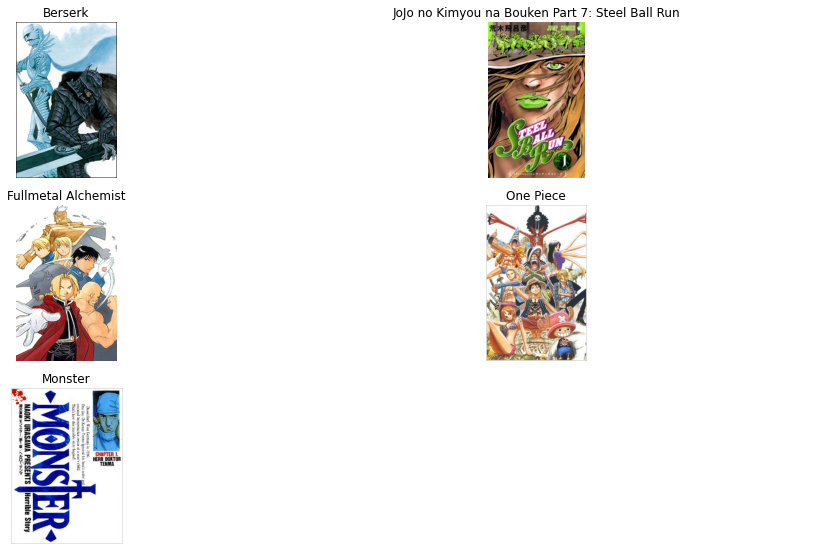

In [27]:
ap.show(ani_man,'title','main_picture')

## Myanimelist_manga_pie

In [28]:
num,t=dp.genres_process(ap.myanimelist_manga.Genres)

In [29]:
ap.plot_pie(num,'Myanimelist_manga')

As you can see in the graph above,that among all kinds of manga, the **Drama**,**Comedy**,**Romance** and **Action** are the top 4.And they are similar to the kinds of anime, which are **Comedy**,**Action**,**Drama**

## Words_cloud of Myani_manga

In [30]:
ap.word_cloud(num,'Myanimelist_manga')

## Myanimelist_manga_Heapmap

In [31]:
df=ap.myanimelist_manga
df1=df[['ranking','popularity','mean','scoring_users','list_users']]
df2=df1.apply(lambda x:x.astype(float))

In [32]:
df.head()

,id,title,main_picture,ranking,popularity,start_date,related_anime,related_manga,mean,genres,...,Mecha,Josei,Shounen Ai,Gender Bender,Harem,Martial Arts,Kids,Police,Dementia,Cars
0,2,Berserk,https://api-cdn.myanimelist.net/images/manga/1...,1,3,1989-08-25,[],"[{'node': {'id': 92299, 'title': 'Berserk: Shi...",9.34,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",...,0,0,0,0,0,0,0,0,0,0
1,1706,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,https://api-cdn.myanimelist.net/images/manga/3...,2,40,2004-01-19,[],"[{'node': {'id': 3009, 'title': 'JoJo no Kimyo...",9.22,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",...,0,0,0,0,0,0,0,0,0,0
2,25,Fullmetal Alchemist,https://api-cdn.myanimelist.net/images/manga/1...,3,11,2001-07-12,[],"[{'node': {'id': 4658, 'title': 'Fullmetal Alc...",9.11,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",...,0,0,0,0,0,0,0,0,0,0
3,13,One Piece,https://api-cdn.myanimelist.net/images/manga/3...,4,2,1997-07-22,[],"[{'node': {'id': 793, 'title': 'Wanted!', 'mai...",9.09,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",...,0,0,0,0,0,0,0,0,0,0
4,1,Monster,https://api-cdn.myanimelist.net/images/manga/3...,5,41,1994-12-05,[],"[{'node': {'id': 10968, 'title': 'Mou Hitotsu ...",9.08,"[{'id': 8, 'name': 'Drama'}, {'id': 7, 'name':...",...,0,0,0,0,0,0,0,0,0,0


In [33]:
values = [[i, j, round(df2.corr(method='spearman').values.tolist()[i][j], 2)] for i in range(5) for j in range(5)]
columns = list(df2.columns)
ap.heat_map_echart(values,columns,'Myanimelist_manga')

Based on the heatmap shown above, the mean(score) is related with **popularity,list_users and scoing_users**

## Randomforest regression of Myanimelist_manga

In [34]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
df=ap.myanimelist_manga
df['media_type'] = class_le.fit_transform(df['media_type'].values)
x = df.iloc[:, 4:].drop(['start_date', 'related_anime','related_manga','mean','genres','serialization','Genres'], axis=1).values
y = df.loc[:, ['mean']].values.ravel()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)        
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('mean_absolute_error:',mae)
# y_pred

mean_absolute_error: 0.1625263333333336


The Randomforest regression can predict the manga score with a MAE of around 0.16

## Feature_Importance

In [35]:
rf_fea = [i*100 for i in rf.feature_importances_]
rf_fea_name = df.iloc[:, 4:].drop(['start_date', 'related_anime','related_manga','mean','genres','serialization','Genres'], axis=1).columns.to_list()
ap.plot_bar('My_manga_rf',rf_fea_name,rf_fea)

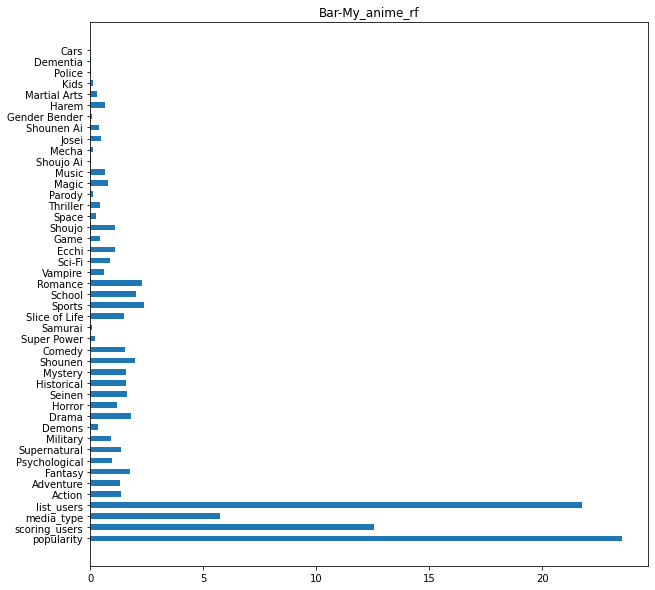

In [36]:
ap.plot_bar('My_anime_rf',rf_fea_name,rf_fea,echarts=False)

By using Random forest, I can get a conclusion that is similar to the heatmap, which is the mean(score) is related with **popularity,list_users and scoing_users**. And the type of the manga has little impact on the manga's score

Also, I can get similar result by using Catboost.

## Catboost

In [37]:
df=ap.myanimelist_manga
df['media_type'] = class_le.fit_transform(df['media_type'].values)
x3=df.iloc[:,4:].drop(['start_date', 'related_anime','related_manga','mean','genres','serialization','Genres'],axis=1)
y3=df.loc[:,['mean']]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x3,y3,test_size=0.3)
int_cols=['popularity','scoring_users','list_users']
for col in int_cols:
    x3[col]=x3[col].astype(float)
#coding=utf8
from catboost import CatBoostRegressor
categorical_features_indices = np.where(pd.DataFrame(x3).dtypes != np.float)[0]#类别型特征
#model = CatBoostClassifier(iterations=100, depth=5,cat_features=categorical_features_indices,
#                           learning_rate=0.5, loss_function='Logloss',logging_level='Verbose')
model = CatBoostRegressor(iterations=1000, depth=3,cat_features=categorical_features_indices,
                           learning_rate=0.1, loss_function='MAE',logging_level='Verbose')
model.fit(X_train,Y_train,eval_set=(X_test, Y_test),plot=True)
fea_ = model.feature_importances_
fea_name = model.feature_names_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.1969604	test: 0.1852291	best: 0.1852291 (0)	total: 25.6ms	remaining: 25.6s
1:	learn: 0.1934923	test: 0.1832248	best: 0.1832248 (1)	total: 48.5ms	remaining: 24.2s
2:	learn: 0.1891572	test: 0.1809865	best: 0.1809865 (2)	total: 77.7ms	remaining: 25.8s
3:	learn: 0.1859217	test: 0.1785850	best: 0.1785850 (3)	total: 97.7ms	remaining: 24.3s
4:	learn: 0.1824164	test: 0.1767823	best: 0.1767823 (4)	total: 128ms	remaining: 25.5s
5:	learn: 0.1804494	test: 0.1758680	best: 0.1758680 (5)	total: 161ms	remaining: 26.7s
6:	learn: 0.1781375	test: 0.1753786	best: 0.1753786 (6)	total: 195ms	remaining: 27.6s
7:	learn: 0.1766053	test: 0.1751173	best: 0.1751173 (7)	total: 226ms	remaining: 28.1s
8:	learn: 0.1746201	test: 0.1746374	best: 0.1746374 (8)	total: 258ms	remaining: 28.4s
9:	learn: 0.1728172	test: 0.1744639	best: 0.1744639 (9)	total: 291ms	remaining: 28.8s
10:	learn: 0.1711294	test: 0.1742399	best: 0.1742399 (10)	total: 321ms	remaining: 28.9s
11:	learn: 0.1700849	test: 0.1743943	best: 0.174

94:	learn: 0.1386835	test: 0.1680493	best: 0.1680493 (94)	total: 3.38s	remaining: 32.2s
95:	learn: 0.1384196	test: 0.1679413	best: 0.1679413 (95)	total: 3.44s	remaining: 32.4s
96:	learn: 0.1382475	test: 0.1678694	best: 0.1678694 (96)	total: 3.47s	remaining: 32.3s
97:	learn: 0.1381711	test: 0.1678764	best: 0.1678694 (96)	total: 3.5s	remaining: 32.2s
98:	learn: 0.1376787	test: 0.1680553	best: 0.1678694 (96)	total: 3.53s	remaining: 32.1s
99:	learn: 0.1375130	test: 0.1681249	best: 0.1678694 (96)	total: 3.56s	remaining: 32.1s
100:	learn: 0.1371945	test: 0.1681054	best: 0.1678694 (96)	total: 3.59s	remaining: 32s
101:	learn: 0.1369675	test: 0.1679254	best: 0.1678694 (96)	total: 3.62s	remaining: 31.9s
102:	learn: 0.1365998	test: 0.1677912	best: 0.1677912 (102)	total: 3.65s	remaining: 31.8s
103:	learn: 0.1365352	test: 0.1677972	best: 0.1677912 (102)	total: 3.69s	remaining: 31.8s
104:	learn: 0.1364685	test: 0.1678401	best: 0.1677912 (102)	total: 3.72s	remaining: 31.7s
105:	learn: 0.1361130	test:

187:	learn: 0.1224270	test: 0.1681726	best: 0.1670085 (142)	total: 6.71s	remaining: 29s
188:	learn: 0.1222752	test: 0.1681656	best: 0.1670085 (142)	total: 6.74s	remaining: 28.9s
189:	learn: 0.1220848	test: 0.1680581	best: 0.1670085 (142)	total: 6.78s	remaining: 28.9s
190:	learn: 0.1220071	test: 0.1680569	best: 0.1670085 (142)	total: 6.81s	remaining: 28.9s
191:	learn: 0.1218448	test: 0.1678362	best: 0.1670085 (142)	total: 6.84s	remaining: 28.8s
192:	learn: 0.1217481	test: 0.1677513	best: 0.1670085 (142)	total: 6.88s	remaining: 28.8s
193:	learn: 0.1216390	test: 0.1676932	best: 0.1670085 (142)	total: 6.92s	remaining: 28.7s
194:	learn: 0.1215831	test: 0.1677853	best: 0.1670085 (142)	total: 6.95s	remaining: 28.7s
195:	learn: 0.1214602	test: 0.1677282	best: 0.1670085 (142)	total: 6.99s	remaining: 28.7s
196:	learn: 0.1213540	test: 0.1675374	best: 0.1670085 (142)	total: 7.01s	remaining: 28.6s
197:	learn: 0.1212768	test: 0.1675331	best: 0.1670085 (142)	total: 7.05s	remaining: 28.5s
198:	learn: 

279:	learn: 0.1153294	test: 0.1683956	best: 0.1670085 (142)	total: 10.1s	remaining: 26s
280:	learn: 0.1152400	test: 0.1683867	best: 0.1670085 (142)	total: 10.1s	remaining: 25.9s
281:	learn: 0.1151946	test: 0.1682796	best: 0.1670085 (142)	total: 10.2s	remaining: 25.9s
282:	learn: 0.1151143	test: 0.1682293	best: 0.1670085 (142)	total: 10.2s	remaining: 25.9s
283:	learn: 0.1150646	test: 0.1682047	best: 0.1670085 (142)	total: 10.3s	remaining: 25.9s
284:	learn: 0.1149891	test: 0.1680872	best: 0.1670085 (142)	total: 10.3s	remaining: 25.8s
285:	learn: 0.1149823	test: 0.1680890	best: 0.1670085 (142)	total: 10.3s	remaining: 25.8s
286:	learn: 0.1149762	test: 0.1680914	best: 0.1670085 (142)	total: 10.4s	remaining: 25.7s
287:	learn: 0.1149177	test: 0.1681283	best: 0.1670085 (142)	total: 10.4s	remaining: 25.7s
288:	learn: 0.1148188	test: 0.1681523	best: 0.1670085 (142)	total: 10.4s	remaining: 25.6s
289:	learn: 0.1148064	test: 0.1681374	best: 0.1670085 (142)	total: 10.5s	remaining: 25.6s
290:	learn: 

371:	learn: 0.1096693	test: 0.1668739	best: 0.1668193 (365)	total: 13.4s	remaining: 22.6s
372:	learn: 0.1095171	test: 0.1667965	best: 0.1667965 (372)	total: 13.4s	remaining: 22.5s
373:	learn: 0.1094898	test: 0.1668296	best: 0.1667965 (372)	total: 13.4s	remaining: 22.5s
374:	learn: 0.1094581	test: 0.1668067	best: 0.1667965 (372)	total: 13.5s	remaining: 22.4s
375:	learn: 0.1094448	test: 0.1668027	best: 0.1667965 (372)	total: 13.5s	remaining: 22.4s
376:	learn: 0.1094097	test: 0.1667975	best: 0.1667965 (372)	total: 13.5s	remaining: 22.4s
377:	learn: 0.1093484	test: 0.1667955	best: 0.1667955 (377)	total: 13.6s	remaining: 22.3s
378:	learn: 0.1093291	test: 0.1667918	best: 0.1667918 (378)	total: 13.6s	remaining: 22.3s
379:	learn: 0.1092451	test: 0.1667719	best: 0.1667719 (379)	total: 13.6s	remaining: 22.2s
380:	learn: 0.1091264	test: 0.1667204	best: 0.1667204 (380)	total: 13.7s	remaining: 22.2s
381:	learn: 0.1091079	test: 0.1667514	best: 0.1667204 (380)	total: 13.7s	remaining: 22.2s
382:	learn

465:	learn: 0.1051392	test: 0.1665211	best: 0.1663791 (442)	total: 17.1s	remaining: 19.6s
466:	learn: 0.1051000	test: 0.1665318	best: 0.1663791 (442)	total: 17.1s	remaining: 19.6s
467:	learn: 0.1050448	test: 0.1665600	best: 0.1663791 (442)	total: 17.2s	remaining: 19.5s
468:	learn: 0.1050361	test: 0.1665809	best: 0.1663791 (442)	total: 17.2s	remaining: 19.5s
469:	learn: 0.1049622	test: 0.1666187	best: 0.1663791 (442)	total: 17.2s	remaining: 19.4s
470:	learn: 0.1049102	test: 0.1665997	best: 0.1663791 (442)	total: 17.3s	remaining: 19.4s
471:	learn: 0.1048967	test: 0.1666176	best: 0.1663791 (442)	total: 17.3s	remaining: 19.4s
472:	learn: 0.1048308	test: 0.1665952	best: 0.1663791 (442)	total: 17.3s	remaining: 19.3s
473:	learn: 0.1047762	test: 0.1665934	best: 0.1663791 (442)	total: 17.4s	remaining: 19.3s
474:	learn: 0.1047755	test: 0.1665953	best: 0.1663791 (442)	total: 17.4s	remaining: 19.3s
475:	learn: 0.1047604	test: 0.1665367	best: 0.1663791 (442)	total: 17.5s	remaining: 19.2s
476:	learn

557:	learn: 0.1020321	test: 0.1656646	best: 0.1656557 (555)	total: 20.6s	remaining: 16.3s
558:	learn: 0.1020030	test: 0.1656747	best: 0.1656557 (555)	total: 20.6s	remaining: 16.3s
559:	learn: 0.1019473	test: 0.1656791	best: 0.1656557 (555)	total: 20.7s	remaining: 16.2s
560:	learn: 0.1019466	test: 0.1656880	best: 0.1656557 (555)	total: 20.7s	remaining: 16.2s
561:	learn: 0.1019392	test: 0.1656814	best: 0.1656557 (555)	total: 20.7s	remaining: 16.2s
562:	learn: 0.1019363	test: 0.1656969	best: 0.1656557 (555)	total: 20.8s	remaining: 16.1s
563:	learn: 0.1019229	test: 0.1656825	best: 0.1656557 (555)	total: 20.8s	remaining: 16.1s
564:	learn: 0.1019135	test: 0.1656842	best: 0.1656557 (555)	total: 20.8s	remaining: 16s
565:	learn: 0.1019069	test: 0.1657109	best: 0.1656557 (555)	total: 20.9s	remaining: 16s
566:	learn: 0.1018921	test: 0.1657171	best: 0.1656557 (555)	total: 20.9s	remaining: 16s
567:	learn: 0.1018743	test: 0.1657238	best: 0.1656557 (555)	total: 21s	remaining: 16s
568:	learn: 0.101858

654:	learn: 0.0990494	test: 0.1653412	best: 0.1653054 (625)	total: 24.4s	remaining: 12.8s
655:	learn: 0.0990373	test: 0.1653590	best: 0.1653054 (625)	total: 24.4s	remaining: 12.8s
656:	learn: 0.0990263	test: 0.1653750	best: 0.1653054 (625)	total: 24.5s	remaining: 12.8s
657:	learn: 0.0990055	test: 0.1653768	best: 0.1653054 (625)	total: 24.5s	remaining: 12.7s
658:	learn: 0.0990001	test: 0.1653753	best: 0.1653054 (625)	total: 24.5s	remaining: 12.7s
659:	learn: 0.0989984	test: 0.1653715	best: 0.1653054 (625)	total: 24.6s	remaining: 12.7s
660:	learn: 0.0989877	test: 0.1653622	best: 0.1653054 (625)	total: 24.6s	remaining: 12.6s
661:	learn: 0.0989619	test: 0.1653489	best: 0.1653054 (625)	total: 24.7s	remaining: 12.6s
662:	learn: 0.0989391	test: 0.1653201	best: 0.1653054 (625)	total: 24.7s	remaining: 12.6s
663:	learn: 0.0989390	test: 0.1653277	best: 0.1653054 (625)	total: 24.8s	remaining: 12.5s
664:	learn: 0.0989339	test: 0.1653426	best: 0.1653054 (625)	total: 24.8s	remaining: 12.5s
665:	learn

747:	learn: 0.0975146	test: 0.1654250	best: 0.1653003 (670)	total: 28.1s	remaining: 9.45s
748:	learn: 0.0975125	test: 0.1654338	best: 0.1653003 (670)	total: 28.1s	remaining: 9.41s
749:	learn: 0.0975056	test: 0.1654365	best: 0.1653003 (670)	total: 28.1s	remaining: 9.37s
750:	learn: 0.0974783	test: 0.1654318	best: 0.1653003 (670)	total: 28.1s	remaining: 9.33s
751:	learn: 0.0974570	test: 0.1654400	best: 0.1653003 (670)	total: 28.2s	remaining: 9.29s
752:	learn: 0.0974424	test: 0.1654232	best: 0.1653003 (670)	total: 28.2s	remaining: 9.26s
753:	learn: 0.0974353	test: 0.1654186	best: 0.1653003 (670)	total: 28.3s	remaining: 9.22s
754:	learn: 0.0973917	test: 0.1654332	best: 0.1653003 (670)	total: 28.3s	remaining: 9.18s
755:	learn: 0.0973780	test: 0.1654158	best: 0.1653003 (670)	total: 28.4s	remaining: 9.16s
756:	learn: 0.0973572	test: 0.1654409	best: 0.1653003 (670)	total: 28.4s	remaining: 9.12s
757:	learn: 0.0973526	test: 0.1654433	best: 0.1653003 (670)	total: 28.4s	remaining: 9.08s
758:	learn

842:	learn: 0.0955556	test: 0.1652465	best: 0.1652396 (835)	total: 31.6s	remaining: 5.88s
843:	learn: 0.0955523	test: 0.1652392	best: 0.1652392 (843)	total: 31.6s	remaining: 5.84s
844:	learn: 0.0955384	test: 0.1652588	best: 0.1652392 (843)	total: 31.7s	remaining: 5.81s
845:	learn: 0.0955330	test: 0.1652523	best: 0.1652392 (843)	total: 31.7s	remaining: 5.77s
846:	learn: 0.0954935	test: 0.1652564	best: 0.1652392 (843)	total: 31.7s	remaining: 5.73s
847:	learn: 0.0954933	test: 0.1652537	best: 0.1652392 (843)	total: 31.8s	remaining: 5.7s
848:	learn: 0.0954928	test: 0.1652579	best: 0.1652392 (843)	total: 31.9s	remaining: 5.67s
849:	learn: 0.0954853	test: 0.1652534	best: 0.1652392 (843)	total: 31.9s	remaining: 5.63s
850:	learn: 0.0954369	test: 0.1652655	best: 0.1652392 (843)	total: 32s	remaining: 5.6s
851:	learn: 0.0954274	test: 0.1652813	best: 0.1652392 (843)	total: 32s	remaining: 5.56s
852:	learn: 0.0954151	test: 0.1652858	best: 0.1652392 (843)	total: 32s	remaining: 5.52s
853:	learn: 0.0953

938:	learn: 0.0936229	test: 0.1644984	best: 0.1644984 (938)	total: 35.3s	remaining: 2.29s
939:	learn: 0.0936221	test: 0.1644984	best: 0.1644984 (938)	total: 35.4s	remaining: 2.26s
940:	learn: 0.0935977	test: 0.1644987	best: 0.1644984 (938)	total: 35.4s	remaining: 2.22s
941:	learn: 0.0935962	test: 0.1644989	best: 0.1644984 (938)	total: 35.5s	remaining: 2.18s
942:	learn: 0.0935892	test: 0.1644945	best: 0.1644945 (942)	total: 35.5s	remaining: 2.15s
943:	learn: 0.0935886	test: 0.1644957	best: 0.1644945 (942)	total: 35.5s	remaining: 2.11s
944:	learn: 0.0935798	test: 0.1644785	best: 0.1644785 (944)	total: 35.6s	remaining: 2.07s
945:	learn: 0.0935729	test: 0.1644630	best: 0.1644630 (945)	total: 35.6s	remaining: 2.03s
946:	learn: 0.0935632	test: 0.1644919	best: 0.1644630 (945)	total: 35.7s	remaining: 2s
947:	learn: 0.0935519	test: 0.1644758	best: 0.1644630 (945)	total: 35.7s	remaining: 1.96s
948:	learn: 0.0935514	test: 0.1644756	best: 0.1644630 (945)	total: 35.7s	remaining: 1.92s
949:	learn: 0

The Catboost can predict the manga score with a MAE of around 0.16

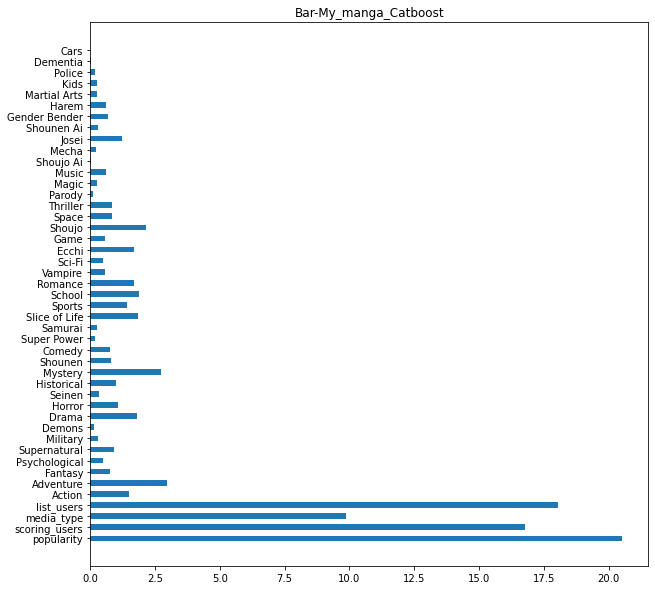

In [38]:
ap.plot_bar('My_manga_Catboost',fea_name,fea_,echarts=False)

In [39]:
ap.plot_bar('My_manga_Catboost',fea_name,fea_)

## Model evaluation-Get the Confidence interval %95

In [40]:
from sklearn.model_selection import cross_val_score

mdl = RandomForestRegressor()

scoring = 'neg_mean_absolute_error'    #'r2'
scores = cross_val_score(mdl, x, y, cv=5, scoring=scoring)
miu = scores.mean()
delt =  scores.std()
print('\nmean:{0:.2f},std:{1:.2f}'.format(miu, delt))
print('Confidence interval%95：[{:.2f},{:.2f}]'.format(miu-2*delt, miu+2*delt))


mean:-0.23,std:0.12
Confidence interval%95：[-0.46,0.00]


In [41]:
categorical_features_indices = np.where(pd.DataFrame(x3).dtypes != np.float)[0]#类别型特征
#model = CatBoostClassifier(iterations=100, depth=5,cat_features=categorical_features_indices,
#                           learning_rate=0.5, loss_function='Logloss',logging_level='Verbose')
model = CatBoostRegressor(iterations=1000, depth=3,cat_features=categorical_features_indices,
                           learning_rate=0.1, loss_function='MAE',logging_level='Verbose')
scores = cross_val_score(mdl, x3, y3.values.ravel(), cv=5, scoring=scoring)



In [42]:
miu = scores.mean()
delt =  scores.std()
print('\mean:{0:.2f},std:{1:.2f}'.format(miu, delt))
print('Confidence interval%95：[{:.2f},{:.2f}]'.format(miu-2*delt, miu+2*delt))

\mean:-0.23,std:0.12
Confidence interval%95：[-0.46,0.01]


# Synthetic analysis

In [16]:
manga_sales=ap.manga_sales
manga_sales.loc[1,'Approximate sales']='275 million'
anime=ap.myanimelist_anime.iloc[:,:20]
manga=ap.myanimelist_manga.iloc[:,1:15]

In [17]:
manga_sales.loc[:,'Approximate sales' ]=manga_sales.loc[:,'Approximate sales' ].apply(lambda x:float(x.split()[0]))

In [18]:
manga_sales

,rank,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales
0,1,One Piece,Eiichiro Oda,Shueisha,Shōnen,97,1997–present,470.0
1,2,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,275.0
2,3,Golgo 13,Takao Saito,Shogakukan,Seinen,197,1968–present,280.0
3,4,Naruto,Masashi Kishimoto,Shueisha,Shōnen,72,1999–2014,250.0
4,5,Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,98,1994–present,230.0
...,...,...,...,...,...,...,...,...
142,143,Shōnen Ashibe,Hiromi Morishita,Shueisha,Seinen,8,1988–1994,20.0
143,144,Sukeban Deka,Shinji Wada,Hakusensha,Shōjo,22,1976–1982,20.0
144,145,That Time I Got Reincarnated as a Slime,Taiki Kawakami,Kodansha,Shōnen,15,2015-present,20.0
145,146,Tokyo Daigaku Monogatari,Tatsuya Egawa,Shogakukan,Seinen,34,1992–2001,20.0


## Anime vs Manga

In [19]:
df_merge1=pd.merge(anime,manga,left_on='name',right_on='title',how='right')
df_merge1=df_merge1.dropna(axis=0,how='any')
df_animanga=df_merge1[['rank','name','Studios','Genres_x','Popularity','Favorites','type',
                       'members','score','eps','ranking','popularity','mean','scoring_users',
                       'list_users','Genres_y']]
df_animanga1=df_animanga.drop(['name','Studios','Genres_x','type','Genres_y'],axis=1)
values = [[i, j, round(df_animanga1.corr(method='spearman').values.tolist()[i][j], 2)] for i in range(11) for j in range(11)]
columns = list(df_animanga1.columns)
ap.heat_map_echart(values,columns,'Myanimelist_anime&Manga')

As shown in the heatmap above, I can conclude that the anime's rank and the related manga's ranking do have relationship, BTW, the anime's score also relate the manga's score

In [20]:
df_merge1.head()

,rank,name,link,img_link,Studios,Source,Genres_x,Popularity,Favorites,type,...,start_date,related_anime,related_manga,mean,genres,scoring_users,media_type,serialization,list_users,Genres_y
2,319.0,Fullmetal Alchemist,https://myanimelist.net/anime/121/Fullmetal_Al...,https://cdn.myanimelist.net/r/100x140/images/a...,Bones,Manga,"['Action', 'Adventure', 'Comedy', 'Drama', 'Fa...",49.0,25855.0,5.0,...,2001-07-12,[],"[{'node': {'id': 4658, 'title': 'Fullmetal Alc...",9.11,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",115785,manga,"[{'node': {'id': 13, 'name': 'Shounen Gangan'}}]",207619,"['Action', 'Adventure', 'Comedy', 'Military', ..."
3,319.0,Fullmetal Alchemist,https://myanimelist.net/anime/121/Fullmetal_Al...,https://cdn.myanimelist.net/r/100x140/images/a...,Bones,Manga,"['Action', 'Adventure', 'Comedy', 'Drama', 'Fa...",49.0,25855.0,5.0,...,2003-02,[],"[{'node': {'id': 25, 'title': 'Fullmetal Alche...",8.48,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",4199,novel,[],11830,"['Action', 'Adventure', 'Psychological', 'Supe..."
4,101.0,One Piece,https://myanimelist.net/anime/21/One_Piece,https://cdn.myanimelist.net/r/100x140/images/a...,Toei Animation,Manga,"['Action', 'Adventure', 'Comedy', 'Super Power...",29.0,110413.0,5.0,...,1997-07-22,[],"[{'node': {'id': 793, 'title': 'Wanted!', 'mai...",9.09,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",201262,manga,"[{'node': {'id': 83, 'name': 'Shounen Jump (We...",332373,"['Action', 'Adventure', 'Fantasy', 'Super Powe..."
5,35.0,Monster,https://myanimelist.net/anime/19/Monster,https://cdn.myanimelist.net/r/100x140/images/a...,Madhouse,Manga,"['Drama', 'Horror', 'Mystery', 'Police', 'Psyc...",171.0,27039.0,5.0,...,1994-12-05,[],"[{'node': {'id': 10968, 'title': 'Mou Hitotsu ...",9.08,"[{'id': 8, 'name': 'Drama'}, {'id': 7, 'name':...",45115,manga,"[{'node': {'id': 1, 'name': 'Big Comic Origina...",113363,"['Drama', 'Mystery', 'Psychological', 'Seinen']"
8,144.0,Grand Blue,https://myanimelist.net/anime/37105/Grand_Blue,https://cdn.myanimelist.net/r/100x140/images/a...,Zero-G,Manga,"['Slice of Life', 'Comedy', 'Seinen']",327.0,8277.0,5.0,...,2014-04-07,[],[],9.01,"[{'id': 4, 'name': 'Comedy'}, {'id': 36, 'name...",30864,manga,"[{'node': {'id': 316, 'name': 'good! Afternoon...",87161,"['Comedy', 'Slice of Life', 'Seinen']"


As the two bar charts shown above, the anime's score and it's related manga's score do not have big difference.

# Manga && Manga sales

In [21]:
df_merge2=pd.merge(manga,manga_sales,left_on='title',right_on='Manga series',how='right')
df_merge2=df_merge2.dropna(axis=0,how='any')
df_manga_and_sales=df_merge2[['title','ranking','popularity','mean','scoring_users','list_users','rank','Approximate sales']]
df_manga_and_sales1=df_manga_and_sales.drop(['title'],axis=1)
values = [[i, j, round(df_manga_and_sales1.corr(method='spearman').values.tolist()[i][j], 2)] for i in range(7) for j in range(7)]
columns = list(df_manga_and_sales1.columns)
ap.heat_map_echart(values,columns,'Manga&Manga_sales')

The result shows that according to my manga and manga sales data, there is little relationship between manga ranking and manga sales/manga sales rank.

In [22]:
df_manga_and_sales

,title,ranking,popularity,mean,scoring_users,list_users,rank,Approximate sales
0,One Piece,4.0,2.0,9.09,201262.0,332373.0,1,470.0
1,Dragon Ball,149.0,52.0,8.43,64164.0,103034.0,2,275.0
3,Naruto,549.0,4.0,8.07,214172.0,317592.0,4,250.0
4,Detective Conan,295.0,201.0,8.27,22054.0,42966.0,5,230.0
5,Black Jack,222.0,737.0,8.34,4352.0,14780.0,6,176.0
8,Slam Dunk,9.0,81.0,9.00,37940.0,78130.0,9,126.0
13,Doraemon,151.0,1328.0,8.43,4599.0,8927.0,14,100.0
17,Touch,220.0,1374.0,8.34,3749.0,8710.0,18,100.0
18,Hajime no Ippo,45.0,164.0,8.68,24126.0,51689.0,19,96.0
20,Vagabond,6.0,19.0,9.08,51785.0,150852.0,21,82.0


# Anime && Manga && Manga_sales

In [23]:
df_merge3=pd.merge(anime,df_merge2,left_on='name',right_on='title',how='right')
df_merge3=df_merge3.dropna(axis=0,how='any')
df_all=df_merge3[['rank_x','name','Studios','Popularity','Favorites','members','score','ranking','popularity','mean','scoring_users',
                 'list_users','rank_y','Approximate sales']]
new_col = ['Anime_rank', 'Name','Studios','Ani_pop','Ani_Fav','Ani_mem','Ani_score','Man_rank', 'Man_pop','Man_score','Man_s_users'
          ,'Man_list_users','Man_sales_rank','Sales']
df_all.columns = new_col
df_all

,Anime_rank,Name,Studios,Ani_pop,Ani_Fav,Ani_mem,Ani_score,Man_rank,Man_pop,Man_score,Man_s_users,Man_list_users,Man_sales_rank,Sales
0,101.0,One Piece,Toei Animation,29.0,110413.0,1209446.0,8.49,4.0,2.0,9.09,201262.0,332373.0,1,470.0
1,498.0,Dragon Ball,Toei Animation,118.0,12548.0,681152.0,8.02,149.0,52.0,8.43,64164.0,103034.0,2,275.0
2,685.0,Naruto,Studio Pierrot,8.0,59528.0,1646530.0,7.89,549.0,4.0,8.07,214172.0,317592.0,4,250.0
3,331.0,Detective Conan,TMS Entertainment,567.0,11015.0,235417.0,8.17,295.0,201.0,8.27,22054.0,42966.0,5,230.0
4,915.0,Black Jack,Tezuka Productions,2937.0,282.0,28840.0,7.75,222.0,737.0,8.34,4352.0,14780.0,6,176.0
5,87.0,Slam Dunk,Toei Animation,732.0,5084.0,186394.0,8.53,9.0,81.0,9.00,37940.0,78130.0,9,126.0
7,487.0,Touch,Gallop,3116.0,468.0,25953.0,8.03,220.0,1374.0,8.34,3749.0,8710.0,18,100.0
8,34.0,Hajime no Ippo,Madhouse,334.0,14946.0,360984.0,8.75,45.0,164.0,8.68,24126.0,51689.0,19,96.0
10,319.0,Fullmetal Alchemist,Bones,49.0,25855.0,1092952.0,8.18,3.0,11.0,9.11,115785.0,207619.0,29,70.3
11,319.0,Fullmetal Alchemist,Bones,49.0,25855.0,1092952.0,8.18,121.0,974.0,8.48,4199.0,11830.0,29,70.3


## Anime && Manga scores

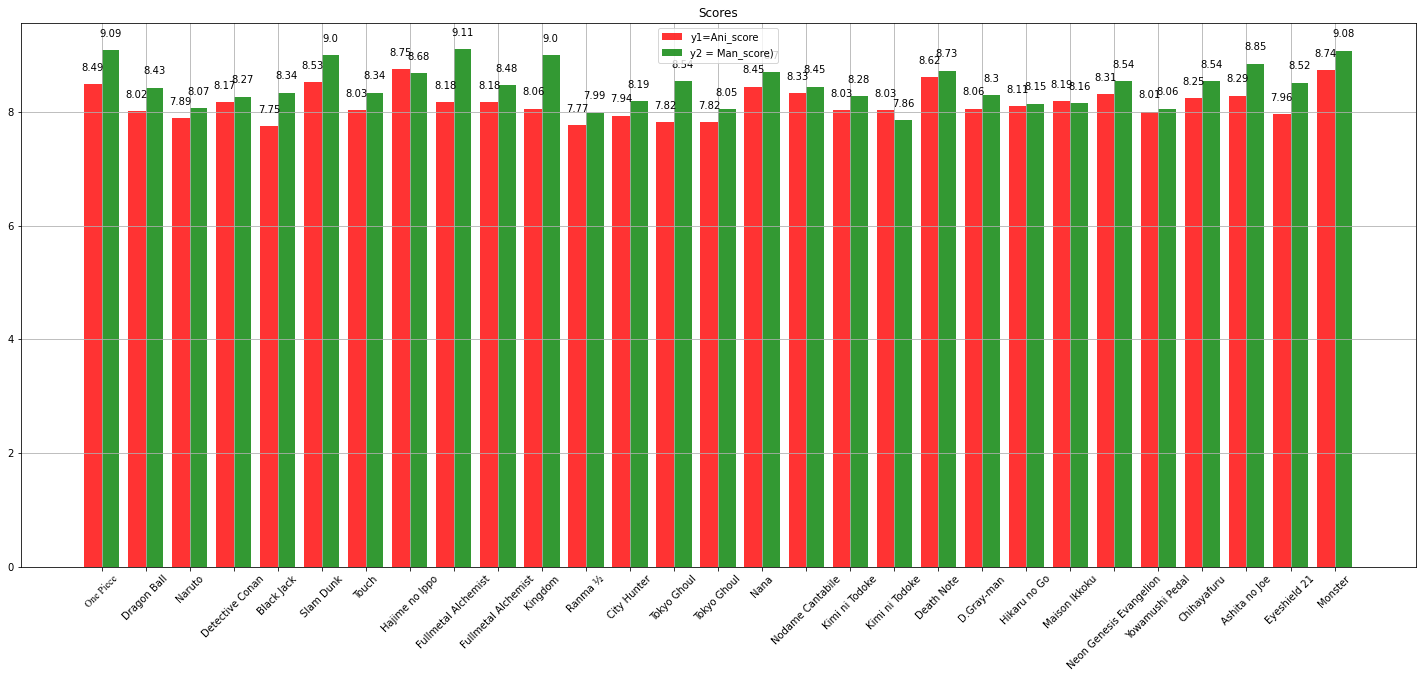

In [24]:
plt.figure(figsize=(25,10))
x=range(len(df_all.Name))
bar1=plt.bar([i - 0.2 for i in x],height=df_all.Ani_score,width=0.4,color='red',alpha = 0.8,label='y1=Ani_score')
bar2=plt.bar([i + 0.2 for i in x],height=df_all.Man_score,width=0.4,color='g',alpha = 0.8,label='y2 = Man_score)')
plt.title('Scores')
plt.xticks(x,df_all.Name,fontproperties = 'Times New Roman' ,size = 10,rotation = 45)
plt.legend()
plt.grid()

for rect in bar1:
    height = rect.get_height()  #获得bar1的高度
    plt.text(rect.get_x() + rect.get_width() / 2, height+0.2, str(height), ha="center", va="bottom")
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+0.2, str(height), ha="center", va="bottom")
plt.show()

In [25]:
from pyecharts.charts import Bar
from pyecharts import options as opts
c = (
    Bar()
    .add_xaxis(list(df_all.Name.values))
    .add_yaxis("Ani_score", list(df_all.Ani_score.values))
    .add_yaxis("Man_score", list(df_all.Man_score.values))
#     .reversal_axis()
    .set_global_opts(
        title_opts={"text": "Score_Bar", "subtext": "Anime&&Man scores"},
        tooltip_opts=opts.TooltipOpts(is_show=True, trigger="axis", axis_pointer_type="shadow"),
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-15)),
#         title_opts=opts.TitleOpts(title=f"Bar-{name}"),
        datazoom_opts=[opts.DataZoomOpts(), opts.DataZoomOpts(type_="inside")],
    )
#     .render("bar_base_dict_config.html")
)
c.render_notebook()

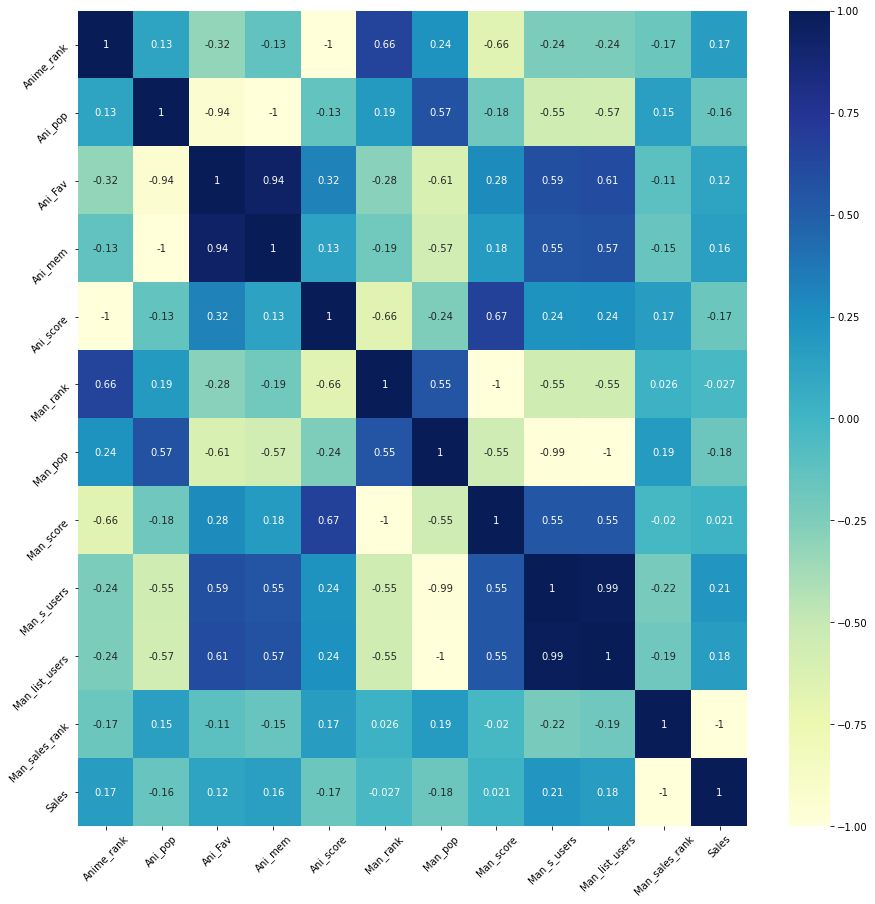

In [26]:
df_all_new=df_all.drop(['Name'],axis=1)
values = [[i, j, round(df_all_new.corr(method='spearman').values.tolist()[i][j], 2)] for i in range(12) for j in range(12)]
columns = list(df_all_new.columns)


fig = plt.figure(figsize=(15,15))
heatmap = sns.heatmap(df_all_new.corr(method='spearman'),cmap="YlGnBu", annot=True)
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=45)
heatmap.set_yticklabels(heatmap.get_yticklabels(),rotation=45)
plt.show()


According to the heatmap shown above the manga_sales have little relation with anime rank/score and manga rank/score

# Anilist_anime_data analysis(additional)

## Get the top anime data

In [55]:
ap.anilist_data.head()

,rank,Name,Img,Page_link,Genres,Percentage,Users,row format,episodes,date,...,Psychological,Thriller,Romance,Supernatural,Sports,Ecchi,Mecha,Horror,Music,Mahou Shoujo
0,1,Hagane no Renkinjutsushi: Fullmetal Alchemist,https://s4.anilist.co/file/anilistcdn/media/an...,https://anilist.co/anime/5114/Hagane-no-Renkin...,"['Action', 'Adventure', 'Drama', 'Fantasy']",91,223398,TV Show,64,Spring 2009,...,0,0,0,0,0,0,0,0,0,0
1,2,Hunter x Hunter (2011),https://s4.anilist.co/file/anilistcdn/media/an...,https://anilist.co/anime/11061/Hunter-x-Hunter...,"['Action', 'Adventure', 'Fantasy']",90,231623,TV Show,148,2011 - 2014,...,0,0,0,0,0,0,0,0,0,0
2,3,Shingeki no Kyojin 3 Part 2,https://s4.anilist.co/file/anilistcdn/media/an...,https://anilist.co/anime/104578/Shingeki-no-Ky...,"['Action', 'Drama', 'Fantasy', 'Mystery']",90,136781,TV Show,10,Spring 2019,...,0,0,0,0,0,0,0,0,0,0
3,4,3-gatsu no Lion 2,https://s4.anilist.co/file/anilistcdn/media/an...,https://anilist.co/anime/98478/3gatsu-no-Lion-2/,"['Drama', 'Slice of Life']",90,49515,TV Show,22,Fall 2017,...,0,0,0,0,0,0,0,0,0,0
4,5,Gintama°,https://s4.anilist.co/file/anilistcdn/media/an...,https://anilist.co/anime/20996/Gintama/,"['Action', 'Comedy', 'Drama', 'Sci-Fi']",90,41536,TV Show,51,Spring 2015,...,0,0,0,0,0,0,0,0,0,0


In [56]:
anime_dic=ap.get_anilist_top(2)
anime_dic

[{'rank': 1,
  'Name': 'Hagane no Renkinjutsushi: Fullmetal Alchemist',
  'Img': 'https://s4.anilist.co/file/anilistcdn/media/anime/cover/medium/bx5114-4CpuT7iWcZ37.png',
  'Page_link': 'https://anilist.co/anime/5114/Hagane-no-Renkinjutsushi-Fullmetal-Alchemist/',
  'Genres': "['Action', 'Adventure', 'Drama', 'Fantasy']",
  'Percentage': 91,
  'Users': 223398,
  'row format': 'TV Show',
  'episodes': '64',
  'date': 'Spring 2009',
  'status': 'Finished'},
 {'rank': 2,
  'Name': 'Hunter x Hunter (2011)',
  'Img': 'https://s4.anilist.co/file/anilistcdn/media/anime/cover/medium/bx11061-sIpBprNRfzCe.png',
  'Page_link': 'https://anilist.co/anime/11061/Hunter-x-Hunter-2011/',
  'Genres': "['Action', 'Adventure', 'Fantasy']",
  'Percentage': 90,
  'Users': 231623,
  'row format': 'TV Show',
  'episodes': '148',
  'date': '2011 - 2014',
  'status': 'Finished'}]

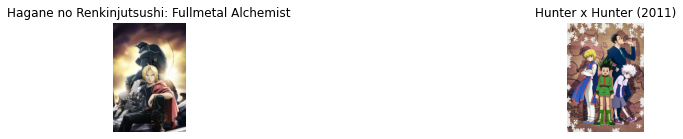

In [57]:
ap.show(anime_dic,'Name','Img')

## Anilist_pie

In [58]:
num,t=dp.genres_process(ap.anilist_data.Genres)

In [59]:
ap.plot_pie(num,'Anilist_anime')

## Anilist_words_Cloud

In [60]:
ap.word_cloud(num,'Anilist_anime')

7.	**What difficulties did you have in completing the project?**

   - First difficulty is that it is hard to scrape everything you want,because there are lots of limits that make it difficult for you to scrape webpage such as API access token and dynamic webpages.
   - Second one is that it's difficult to figure out the function that is exactly what I want, I have to try many times before I finally get the right answer.
   - Finally,since every chart has its advantages and disadvantages, it's laborious to find the right graph or format to show my analysis.

8.	**What skills did you wish you had while you were doing the project?**

   In this project, the skills that I want most are the sensitivity to charts(which can makes me find the right chart in a short time),
   having a cleaner and orderly programming thinking,which can makes my code more readable and when I need to find something in my code, I can find it immediately.

9.	**What would you do “next” to expand or augment the project?**  
   
   I would like to find some more data about the manga_sales, because I think there indeed are some relationships between manga\anime and the manga sales, but because of the small number of manga_sales data, I can't get the clear relations between them.
   
   In addition, I also want to use more graphs and charts to show the deeper relationships between those data.